# Exploratory Data Analysis for Poker games profitable moves predictor


#### - The data was created in the other Notebook "01_Poker_data_preprocessing.ipynb".


# What is a prediction for the most profitable moves to play in a Poker game ?

Each Poker game that we want to analyze below is a No-limit Texas hold ‘em variant, which involves 6 players. The players start with an amount of 10000. The small blind is set to 50, the big blind is set to 100, and the minimum bet is 100.
Each Poker game can be divided into 4 phases : the preflop, the flop, the turn and the river.
During the preflop, each player gets 2 cards that only them can see. At the flop stage, there are 3 community cards available that all players can see. At the turn, they can see an additional community card. And at the river, they can see another additional community card.
During the stages of the game, the players need to decide which actions thay want to do. They have only 3 choices : Fold, Check/call or Raise. If they fold, they no longer play the current game and they lost the money they had put in the pot. If they check/call, they continue to play but don't bet extra money. If they raise, they add an additional amount of money that others players will need to call to continue playing the game.

The goal of this analysis is to try to predict the most profitable moves to play in a poker game. To do that we need to predict for each move if the player needs to fold, check/call or raise. And in case he decides to raise we also need to predict by which amount he wants to raise


## Standard package imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Functions

### Function check_duplicate
This function returns the number of duplicate rows in the DataFrame. 
If it returns 0 there are no duplicate

In [2]:
def check_duplicate(df, subset):
    """
    This function returns the number of duplicate rows in the DataFrame
	If it returns 0 there are no duplicate
    
    Arguments
    ---------
    df: pd.DataFrame
           DataFrame under consideration
    subset: array
           Optional List of feature names based on which 
            duplicate rows are being identified

    Returns
    --------
    number_of_duplicate: Integer
         The number of duplicates rows
    """
    if subset is not None: 
        return df.duplicated(subset=subset, keep=False).sum()
    else:
        return df.duplicated(keep=False).sum()

### Function df_2_cards_combination
This function returns a dataframe of all the possible combination of 2 cards

In [3]:
def df_2_cards_combination():
    """
    This function returns a dataframe of all the possible combination of 2 cards
    
    Arguments
    ---------

    Returns
    --------
    df: pd.DataFrame
           Dataframe of all the possible combination of 2 cards
    """
    dictionary = {'2_cards': {0: 'AA',1: 'AK',2: 'AQ',3: 'AJ',4: 'AT',5: 'A9',6: 'A8',7: 'A7',8: 'A6',9: 'A5',10: 'A4',11: 'A3',12: 'A2',13: 'KA',14: 'KK',15: 'KQ',16: 'KJ',17: 'KT',18: 'K9',19: 'K8',20: 'K7',21: 'K6',22: 'K5',23: 'K4',24: 'K3',25: 'K2',26: 'QA',27: 'QK',28: 'QQ',29: 'QJ',30: 'QT',31: 'Q9',32: 'Q8',33: 'Q7',34: 'Q6',35: 'Q5',36: 'Q4',37: 'Q3',38: 'Q2',39: 'JA',40: 'JK',41: 'JQ',42: 'JJ',43: 'JT',44: 'J9',45: 'J8',46: 'J7',47: 'J6',48: 'J5',49: 'J4',50: 'J3',51: 'J2',52: 'TA',53: 'TK',54: 'TQ',55: 'TJ',56: 'TT',57: 'T9',58: 'T8',59: 'T7',60: 'T6',61: 'T5',62: 'T4',63: 'T3',64: 'T2',65: '9A',66: '9K',67: '9Q',68: '9J',69: '9T',70: '99',71: '98',72: '97',73: '96',74: '95',75: '94',76: '93',77: '92',78: '8A',79: '8K',80: '8Q',81: '8J',82: '8T',83: '89',84: '88',85: '87',86: '86',87: '85',88: '84',89: '83',90: '82',91: '7A',92: '7K',93: '7Q',94: '7J',95: '7T',96: '79',97: '78',98: '77',99: '76',100: '75',101: '74',102: '73',103: '72',104: '6A',105: '6K',106: '6Q',107: '6J',108: '6T',109: '69',110: '68',111: '67',112: '66',113: '65',114: '64',115: '63',116: '62',117: '5A',118: '5K',119: '5Q',120: '5J',121: '5T',122: '59',123: '58',124: '57',125: '56',126: '55',127: '54',128: '53',129: '52',130: '4A',131: '4K',132: '4Q',133: '4J',134: '4T',135: '49',136: '48',137: '47',138: '46',139: '45',140: '44',141: '43',142: '42',143: '3A',144: '3K',145: '3Q',146: '3J',147: '3T',148: '39',149: '38',150: '37',151: '36',152: '35',153: '34',154: '33',155: '32',156: '2A',157: '2K',158: '2Q',159: '2J',160: '2T',161: '29',162: '28',163: '27',164: '26',165: '25',166: '24',167: '23',168: '22'}, 
                  '2_cards_unique': {0: 'AA',1: 'AK',2: 'AQ',3: 'AJ',4: 'AT',5: 'A9',6: 'A8',7: 'A7',8: 'A6',9: 'A5',10: 'A4',11: 'A3',12: 'A2',13: 'AK',14: 'KK',15: 'KQ',16: 'KJ',17: 'KT',18: 'K9',19: 'K8',20: 'K7',21: 'K6',22: 'K5',23: 'K4',24: 'K3',25: 'K2',26: 'AQ',27: 'KQ',28: 'QQ',29: 'QJ',30: 'QT',31: 'Q9',32: 'Q8',33: 'Q7',34: 'Q6',35: 'Q5',36: 'Q4',37: 'Q3',38: 'Q2',39: 'AJ',40: 'KJ',41: 'QJ',42: 'JJ',43: 'JT',44: 'J9',45: 'J8',46: 'J7',47: 'J6',48: 'J5',49: 'J4',50: 'J3',51: 'J2',52: 'AT',53: 'KT',54: 'QT',55: 'JT',56: 'TT',57: 'T9',58: 'T8',59: 'T7',60: 'T6',61: 'T5',62: 'T4',63: 'T3',64: 'T2',65: 'A9',66: 'K9',67: 'Q9',68: 'J9',69: 'T9',70: '99',71: '98',72: '97',73: '96',74: '95',75: '94',76: '93',77: '92',78: 'A8',79: 'K8',80: 'Q8',81: 'J8',82: 'T8',83: '98',84: '88',85: '87',86: '86',87: '85',88: '84',89: '83',90: '82',91: 'A7',92: 'K7',93: 'Q7',94: 'J7',95: 'T7',96: '97',97: '87',98: '77',99: '76',100: '75',101: '74',102: '73',103: '72',104: 'A6',105: 'K6',106: 'Q6',107: 'J6',108: 'T6',109: '96',110: '86',111: '76',112: '66',113: '65',114: '64',115: '63',116: '62',117: 'A5',118: 'K5',119: 'Q5',120: 'J5',121: 'T5',122: '95',123: '85',124: '75',125: '65',126: '55',127: '54',128: '53',129: '52',130: 'A4',131: 'K4',132: 'Q4',133: 'J4',134: 'T4',135: '94',136: '84',137: '74',138: '64',139: '54',140: '44',141: '43',142: '42',143: 'A3',144: 'K3',145: 'Q3',146: 'J3',147: 'T3',148: '93',149: '83',150: '73',151: '63',152: '53',153: '43',154: '33',155: '32',156: 'A2',157: 'K2',158: 'Q2',159: 'J2',160: 'T2',161: '92',162: '82',163: '72',164: '62',165: '52',166: '42',167: '32',168: '22'}}
    return pd.DataFrame.from_dict(dictionary)

### Function df_3_cards_combination
This function returns a dataframe of all the possible combination of 3 cards

In [4]:
def df_3_cards_combination():
    """
    This function returns a dataframe of all the possible combination of 3 cards
    
    Arguments
    ---------

    Returns
    --------
    df: pd.DataFrame
           Dataframe of all the possible combination of 3 cards
    """
    dictionary = {'3_cards': {0:'AAA',1:'AAK',2:'AAQ',3:'AAJ',4:'AAT',5:'AA9',6:'AA8',7:'AA7',8:'AA6',9:'AA5',10:'AA4',11:'AA3',12:'AA2',13:'AKA',14:'AKK',15:'AKQ',16:'AKJ',17:'AKT',18:'AK9',19:'AK8',20:'AK7',21:'AK6',22:'AK5',23:'AK4',24:'AK3',25:'AK2',26:'AQA',27:'AQK',28:'AQQ',29:'AQJ',30:'AQT',31:'AQ9',32:'AQ8',33:'AQ7',34:'AQ6',35:'AQ5',36:'AQ4',37:'AQ3',38:'AQ2',39:'AJA',40:'AJK',41:'AJQ',42:'AJJ',43:'AJT',44:'AJ9',45:'AJ8',46:'AJ7',47:'AJ6',48:'AJ5',49:'AJ4',50:'AJ3',51:'AJ2',52:'ATA',53:'ATK',54:'ATQ',55:'ATJ',56:'ATT',57:'AT9',58:'AT8',59:'AT7',60:'AT6',61:'AT5',62:'AT4',63:'AT3',64:'AT2',65:'A9A',66:'A9K',67:'A9Q',68:'A9J',69:'A9T',70:'A99',71:'A98',72:'A97',73:'A96',74:'A95',75:'A94',76:'A93',77:'A92',78:'A8A',79:'A8K',80:'A8Q',81:'A8J',82:'A8T',83:'A89',84:'A88',85:'A87',86:'A86',87:'A85',88:'A84',89:'A83',90:'A82',91:'A7A',92:'A7K',93:'A7Q',94:'A7J',95:'A7T',96:'A79',97:'A78',98:'A77',99:'A76',100:'A75',101:'A74',102:'A73',103:'A72',104:'A6A',105:'A6K',106:'A6Q',107:'A6J',108:'A6T',109:'A69',110:'A68',111:'A67',112:'A66',113:'A65',114:'A64',115:'A63',116:'A62',117:'A5A',118:'A5K',119:'A5Q',120:'A5J',121:'A5T',122:'A59',123:'A58',124:'A57',125:'A56',126:'A55',127:'A54',128:'A53',129:'A52',130:'A4A',131:'A4K',132:'A4Q',133:'A4J',134:'A4T',135:'A49',136:'A48',137:'A47',138:'A46',139:'A45',140:'A44',141:'A43',142:'A42',143:'A3A',144:'A3K',145:'A3Q',146:'A3J',147:'A3T',148:'A39',149:'A38',150:'A37',151:'A36',152:'A35',153:'A34',154:'A33',155:'A32',156:'A2A',157:'A2K',158:'A2Q',159:'A2J',160:'A2T',161:'A29',162:'A28',163:'A27',164:'A26',165:'A25',166:'A24',167:'A23',168:'A22',169:'KAA',170:'KAK',171:'KAQ',172:'KAJ',173:'KAT',174:'KA9',175:'KA8',176:'KA7',177:'KA6',178:'KA5',179:'KA4',180:'KA3',181:'KA2',182:'KKA',183:'KKK',184:'KKQ',185:'KKJ',186:'KKT',187:'KK9',188:'KK8',189:'KK7',190:'KK6',191:'KK5',192:'KK4',193:'KK3',194:'KK2',195:'KQA',196:'KQK',197:'KQQ',198:'KQJ',199:'KQT',200:'KQ9',201:'KQ8',202:'KQ7',203:'KQ6',204:'KQ5',205:'KQ4',206:'KQ3',207:'KQ2',208:'KJA',209:'KJK',210:'KJQ',211:'KJJ',212:'KJT',213:'KJ9',214:'KJ8',215:'KJ7',216:'KJ6',217:'KJ5',218:'KJ4',219:'KJ3',220:'KJ2',221:'KTA',222:'KTK',223:'KTQ',224:'KTJ',225:'KTT',226:'KT9',227:'KT8',228:'KT7',229:'KT6',230:'KT5',231:'KT4',232:'KT3',233:'KT2',234:'K9A',235:'K9K',236:'K9Q',237:'K9J',238:'K9T',239:'K99',240:'K98',241:'K97',242:'K96',243:'K95',244:'K94',245:'K93',246:'K92',247:'K8A',248:'K8K',249:'K8Q',250:'K8J',251:'K8T',252:'K89',253:'K88',254:'K87',255:'K86',256:'K85',257:'K84',258:'K83',259:'K82',260:'K7A',261:'K7K',262:'K7Q',263:'K7J',264:'K7T',265:'K79',266:'K78',267:'K77',268:'K76',269:'K75',270:'K74',271:'K73',272:'K72',273:'K6A',274:'K6K',275:'K6Q',276:'K6J',277:'K6T',278:'K69',279:'K68',280:'K67',281:'K66',282:'K65',283:'K64',284:'K63',285:'K62',286:'K5A',287:'K5K',288:'K5Q',289:'K5J',290:'K5T',291:'K59',292:'K58',293:'K57',294:'K56',295:'K55',296:'K54',297:'K53',298:'K52',299:'K4A',300:'K4K',301:'K4Q',302:'K4J',303:'K4T',304:'K49',305:'K48',306:'K47',307:'K46',308:'K45',309:'K44',310:'K43',311:'K42',312:'K3A',313:'K3K',314:'K3Q',315:'K3J',316:'K3T',317:'K39',318:'K38',319:'K37',320:'K36',321:'K35',322:'K34',323:'K33',324:'K32',325:'K2A',326:'K2K',327:'K2Q',328:'K2J',329:'K2T',330:'K29',331:'K28',332:'K27',333:'K26',334:'K25',335:'K24',336:'K23',337:'K22',338:'QAA',339:'QAK',340:'QAQ',341:'QAJ',342:'QAT',343:'QA9',344:'QA8',345:'QA7',346:'QA6',347:'QA5',348:'QA4',349:'QA3',350:'QA2',351:'QKA',352:'QKK',353:'QKQ',354:'QKJ',355:'QKT',356:'QK9',357:'QK8',358:'QK7',359:'QK6',360:'QK5',361:'QK4',362:'QK3',363:'QK2',364:'QQA',365:'QQK',366:'QQQ',367:'QQJ',368:'QQT',369:'QQ9',370:'QQ8',371:'QQ7',372:'QQ6',373:'QQ5',374:'QQ4',375:'QQ3',376:'QQ2',377:'QJA',378:'QJK',379:'QJQ',380:'QJJ',381:'QJT',382:'QJ9',383:'QJ8',384:'QJ7',385:'QJ6',386:'QJ5',387:'QJ4',388:'QJ3',389:'QJ2',390:'QTA',391:'QTK',392:'QTQ',393:'QTJ',394:'QTT',395:'QT9',396:'QT8',397:'QT7',398:'QT6',399:'QT5',400:'QT4',401:'QT3',402:'QT2',403:'Q9A',404:'Q9K',405:'Q9Q',406:'Q9J',407:'Q9T',408:'Q99',409:'Q98',410:'Q97',411:'Q96',412:'Q95',413:'Q94',414:'Q93',415:'Q92',416:'Q8A',417:'Q8K',418:'Q8Q',419:'Q8J',420:'Q8T',421:'Q89',422:'Q88',423:'Q87',424:'Q86',425:'Q85',426:'Q84',427:'Q83',428:'Q82',429:'Q7A',430:'Q7K',431:'Q7Q',432:'Q7J',433:'Q7T',434:'Q79',435:'Q78',436:'Q77',437:'Q76',438:'Q75',439:'Q74',440:'Q73',441:'Q72',442:'Q6A',443:'Q6K',444:'Q6Q',445:'Q6J',446:'Q6T',447:'Q69',448:'Q68',449:'Q67',450:'Q66',451:'Q65',452:'Q64',453:'Q63',454:'Q62',455:'Q5A',456:'Q5K',457:'Q5Q',458:'Q5J',459:'Q5T',460:'Q59',461:'Q58',462:'Q57',463:'Q56',464:'Q55',465:'Q54',466:'Q53',467:'Q52',468:'Q4A',469:'Q4K',470:'Q4Q',471:'Q4J',472:'Q4T',473:'Q49',474:'Q48',475:'Q47',476:'Q46',477:'Q45',478:'Q44',479:'Q43',480:'Q42',481:'Q3A',482:'Q3K',483:'Q3Q',484:'Q3J',485:'Q3T',486:'Q39',487:'Q38',488:'Q37',489:'Q36',490:'Q35',491:'Q34',492:'Q33',493:'Q32',494:'Q2A',495:'Q2K',496:'Q2Q',497:'Q2J',498:'Q2T',499:'Q29',500:'Q28',501:'Q27',502:'Q26',503:'Q25',504:'Q24',505:'Q23',506:'Q22',507:'JAA',508:'JAK',509:'JAQ',510:'JAJ',511:'JAT',512:'JA9',513:'JA8',514:'JA7',515:'JA6',516:'JA5',517:'JA4',518:'JA3',519:'JA2',520:'JKA',521:'JKK',522:'JKQ',523:'JKJ',524:'JKT',525:'JK9',526:'JK8',527:'JK7',528:'JK6',529:'JK5',530:'JK4',531:'JK3',532:'JK2',533:'JQA',534:'JQK',535:'JQQ',536:'JQJ',537:'JQT',538:'JQ9',539:'JQ8',540:'JQ7',541:'JQ6',542:'JQ5',543:'JQ4',544:'JQ3',545:'JQ2',546:'JJA',547:'JJK',548:'JJQ',549:'JJJ',550:'JJT',551:'JJ9',552:'JJ8',553:'JJ7',554:'JJ6',555:'JJ5',556:'JJ4',557:'JJ3',558:'JJ2',559:'JTA',560:'JTK',561:'JTQ',562:'JTJ',563:'JTT',564:'JT9',565:'JT8',566:'JT7',567:'JT6',568:'JT5',569:'JT4',570:'JT3',571:'JT2',572:'J9A',573:'J9K',574:'J9Q',575:'J9J',576:'J9T',577:'J99',578:'J98',579:'J97',580:'J96',581:'J95',582:'J94',583:'J93',584:'J92',585:'J8A',586:'J8K',587:'J8Q',588:'J8J',589:'J8T',590:'J89',591:'J88',592:'J87',593:'J86',594:'J85',595:'J84',596:'J83',597:'J82',598:'J7A',599:'J7K',600:'J7Q',601:'J7J',602:'J7T',603:'J79',604:'J78',605:'J77',606:'J76',607:'J75',608:'J74',609:'J73',610:'J72',611:'J6A',612:'J6K',613:'J6Q',614:'J6J',615:'J6T',616:'J69',617:'J68',618:'J67',619:'J66',620:'J65',621:'J64',622:'J63',623:'J62',624:'J5A',625:'J5K',626:'J5Q',627:'J5J',628:'J5T',629:'J59',630:'J58',631:'J57',632:'J56',633:'J55',634:'J54',635:'J53',636:'J52',637:'J4A',638:'J4K',639:'J4Q',640:'J4J',641:'J4T',642:'J49',643:'J48',644:'J47',645:'J46',646:'J45',647:'J44',648:'J43',649:'J42',650:'J3A',651:'J3K',652:'J3Q',653:'J3J',654:'J3T',655:'J39',656:'J38',657:'J37',658:'J36',659:'J35',660:'J34',661:'J33',662:'J32',663:'J2A',664:'J2K',665:'J2Q',666:'J2J',667:'J2T',668:'J29',669:'J28',670:'J27',671:'J26',672:'J25',673:'J24',674:'J23',675:'J22',676:'TAA',677:'TAK',678:'TAQ',679:'TAJ',680:'TAT',681:'TA9',682:'TA8',683:'TA7',684:'TA6',685:'TA5',686:'TA4',687:'TA3',688:'TA2',689:'TKA',690:'TKK',691:'TKQ',692:'TKJ',693:'TKT',694:'TK9',695:'TK8',696:'TK7',697:'TK6',698:'TK5',699:'TK4',700:'TK3',701:'TK2',702:'TQA',703:'TQK',704:'TQQ',705:'TQJ',706:'TQT',707:'TQ9',708:'TQ8',709:'TQ7',710:'TQ6',711:'TQ5',712:'TQ4',713:'TQ3',714:'TQ2',715:'TJA',716:'TJK',717:'TJQ',718:'TJJ',719:'TJT',720:'TJ9',721:'TJ8',722:'TJ7',723:'TJ6',724:'TJ5',725:'TJ4',726:'TJ3',727:'TJ2',728:'TTA',729:'TTK',730:'TTQ',731:'TTJ',732:'TTT',733:'TT9',734:'TT8',735:'TT7',736:'TT6',737:'TT5',738:'TT4',739:'TT3',740:'TT2',741:'T9A',742:'T9K',743:'T9Q',744:'T9J',745:'T9T',746:'T99',747:'T98',748:'T97',749:'T96',750:'T95',751:'T94',752:'T93',753:'T92',754:'T8A',755:'T8K',756:'T8Q',757:'T8J',758:'T8T',759:'T89',760:'T88',761:'T87',762:'T86',763:'T85',764:'T84',765:'T83',766:'T82',767:'T7A',768:'T7K',769:'T7Q',770:'T7J',771:'T7T',772:'T79',773:'T78',774:'T77',775:'T76',776:'T75',777:'T74',778:'T73',779:'T72',780:'T6A',781:'T6K',782:'T6Q',783:'T6J',784:'T6T',785:'T69',786:'T68',787:'T67',788:'T66',789:'T65',790:'T64',791:'T63',792:'T62',793:'T5A',794:'T5K',795:'T5Q',796:'T5J',797:'T5T',798:'T59',799:'T58',800:'T57',801:'T56',802:'T55',803:'T54',804:'T53',805:'T52',806:'T4A',807:'T4K',808:'T4Q',809:'T4J',810:'T4T',811:'T49',812:'T48',813:'T47',814:'T46',815:'T45',816:'T44',817:'T43',818:'T42',819:'T3A',820:'T3K',821:'T3Q',822:'T3J',823:'T3T',824:'T39',825:'T38',826:'T37',827:'T36',828:'T35',829:'T34',830:'T33',831:'T32',832:'T2A',833:'T2K',834:'T2Q',835:'T2J',836:'T2T',837:'T29',838:'T28',839:'T27',840:'T26',841:'T25',842:'T24',843:'T23',844:'T22',845:'9AA',846:'9AK',847:'9AQ',848:'9AJ',849:'9AT',850:'9A9',851:'9A8',852:'9A7',853:'9A6',854:'9A5',855:'9A4',856:'9A3',857:'9A2',858:'9KA',859:'9KK',860:'9KQ',861:'9KJ',862:'9KT',863:'9K9',864:'9K8',865:'9K7',866:'9K6',867:'9K5',868:'9K4',869:'9K3',870:'9K2',871:'9QA',872:'9QK',873:'9QQ',874:'9QJ',875:'9QT',876:'9Q9',877:'9Q8',878:'9Q7',879:'9Q6',880:'9Q5',881:'9Q4',882:'9Q3',883:'9Q2',884:'9JA',885:'9JK',886:'9JQ',887:'9JJ',888:'9JT',889:'9J9',890:'9J8',891:'9J7',892:'9J6',893:'9J5',894:'9J4',895:'9J3',896:'9J2',897:'9TA',898:'9TK',899:'9TQ',900:'9TJ',901:'9TT',902:'9T9',903:'9T8',904:'9T7',905:'9T6',906:'9T5',907:'9T4',908:'9T3',909:'9T2',910:'99A',911:'99K',912:'99Q',913:'99J',914:'99T',915:'999',916:'998',917:'997',918:'996',919:'995',920:'994',921:'993',922:'992',923:'98A',924:'98K',925:'98Q',926:'98J',927:'98T',928:'989',929:'988',930:'987',931:'986',932:'985',933:'984',934:'983',935:'982',936:'97A',937:'97K',938:'97Q',939:'97J',940:'97T',941:'979',942:'978',943:'977',944:'976',945:'975',946:'974',947:'973',948:'972',949:'96A',950:'96K',951:'96Q',952:'96J',953:'96T',954:'969',955:'968',956:'967',957:'966',958:'965',959:'964',960:'963',961:'962',962:'95A',963:'95K',964:'95Q',965:'95J',966:'95T',967:'959',968:'958',969:'957',970:'956',971:'955',972:'954',973:'953',974:'952',975:'94A',976:'94K',977:'94Q',978:'94J',979:'94T',980:'949',981:'948',982:'947',983:'946',984:'945',985:'944',986:'943',987:'942',988:'93A',989:'93K',990:'93Q',991:'93J',992:'93T',993:'939',994:'938',995:'937',996:'936',997:'935',998:'934',999:'933',1000:'932',1001:'92A',1002:'92K',1003:'92Q',1004:'92J',1005:'92T',1006:'929',1007:'928',1008:'927',1009:'926',1010:'925',1011:'924',1012:'923',1013:'922',1014:'8AA',1015:'8AK',1016:'8AQ',1017:'8AJ',1018:'8AT',1019:'8A9',1020:'8A8',1021:'8A7',1022:'8A6',1023:'8A5',1024:'8A4',1025:'8A3',1026:'8A2',1027:'8KA',1028:'8KK',1029:'8KQ',1030:'8KJ',1031:'8KT',1032:'8K9',1033:'8K8',1034:'8K7',1035:'8K6',1036:'8K5',1037:'8K4',1038:'8K3',1039:'8K2',1040:'8QA',1041:'8QK',1042:'8QQ',1043:'8QJ',1044:'8QT',1045:'8Q9',1046:'8Q8',1047:'8Q7',1048:'8Q6',1049:'8Q5',1050:'8Q4',1051:'8Q3',1052:'8Q2',1053:'8JA',1054:'8JK',1055:'8JQ',1056:'8JJ',1057:'8JT',1058:'8J9',1059:'8J8',1060:'8J7',1061:'8J6',1062:'8J5',1063:'8J4',1064:'8J3',1065:'8J2',1066:'8TA',1067:'8TK',1068:'8TQ',1069:'8TJ',1070:'8TT',1071:'8T9',1072:'8T8',1073:'8T7',1074:'8T6',1075:'8T5',1076:'8T4',1077:'8T3',1078:'8T2',1079:'89A',1080:'89K',1081:'89Q',1082:'89J',1083:'89T',1084:'899',1085:'898',1086:'897',1087:'896',1088:'895',1089:'894',1090:'893',1091:'892',1092:'88A',1093:'88K',1094:'88Q',1095:'88J',1096:'88T',1097:'889',1098:'888',1099:'887',1100:'886',1101:'885',1102:'884',1103:'883',1104:'882',1105:'87A',1106:'87K',1107:'87Q',1108:'87J',1109:'87T',1110:'879',1111:'878',1112:'877',1113:'876',1114:'875',1115:'874',1116:'873',1117:'872',1118:'86A',1119:'86K',1120:'86Q',1121:'86J',1122:'86T',1123:'869',1124:'868',1125:'867',1126:'866',1127:'865',1128:'864',1129:'863',1130:'862',1131:'85A',1132:'85K',1133:'85Q',1134:'85J',1135:'85T',1136:'859',1137:'858',1138:'857',1139:'856',1140:'855',1141:'854',1142:'853',1143:'852',1144:'84A',1145:'84K',1146:'84Q',1147:'84J',1148:'84T',1149:'849',1150:'848',1151:'847',1152:'846',1153:'845',1154:'844',1155:'843',1156:'842',1157:'83A',1158:'83K',1159:'83Q',1160:'83J',1161:'83T',1162:'839',1163:'838',1164:'837',1165:'836',1166:'835',1167:'834',1168:'833',1169:'832',1170:'82A',1171:'82K',1172:'82Q',1173:'82J',1174:'82T',1175:'829',1176:'828',1177:'827',1178:'826',1179:'825',1180:'824',1181:'823',1182:'822',1183:'7AA',1184:'7AK',1185:'7AQ',1186:'7AJ',1187:'7AT',1188:'7A9',1189:'7A8',1190:'7A7',1191:'7A6',1192:'7A5',1193:'7A4',1194:'7A3',1195:'7A2',1196:'7KA',1197:'7KK',1198:'7KQ',1199:'7KJ',1200:'7KT',1201:'7K9',1202:'7K8',1203:'7K7',1204:'7K6',1205:'7K5',1206:'7K4',1207:'7K3',1208:'7K2',1209:'7QA',1210:'7QK',1211:'7QQ',1212:'7QJ',1213:'7QT',1214:'7Q9',1215:'7Q8',1216:'7Q7',1217:'7Q6',1218:'7Q5',1219:'7Q4',1220:'7Q3',1221:'7Q2',1222:'7JA',1223:'7JK',1224:'7JQ',1225:'7JJ',1226:'7JT',1227:'7J9',1228:'7J8',1229:'7J7',1230:'7J6',1231:'7J5',1232:'7J4',1233:'7J3',1234:'7J2',1235:'7TA',1236:'7TK',1237:'7TQ',1238:'7TJ',1239:'7TT',1240:'7T9',1241:'7T8',1242:'7T7',1243:'7T6',1244:'7T5',1245:'7T4',1246:'7T3',1247:'7T2',1248:'79A',1249:'79K',1250:'79Q',1251:'79J',1252:'79T',1253:'799',1254:'798',1255:'797',1256:'796',1257:'795',1258:'794',1259:'793',1260:'792',1261:'78A',1262:'78K',1263:'78Q',1264:'78J',1265:'78T',1266:'789',1267:'788',1268:'787',1269:'786',1270:'785',1271:'784',1272:'783',1273:'782',1274:'77A',1275:'77K',1276:'77Q',1277:'77J',1278:'77T',1279:'779',1280:'778',1281:'777',1282:'776',1283:'775',1284:'774',1285:'773',1286:'772',1287:'76A',1288:'76K',1289:'76Q',1290:'76J',1291:'76T',1292:'769',1293:'768',1294:'767',1295:'766',1296:'765',1297:'764',1298:'763',1299:'762',1300:'75A',1301:'75K',1302:'75Q',1303:'75J',1304:'75T',1305:'759',1306:'758',1307:'757',1308:'756',1309:'755',1310:'754',1311:'753',1312:'752',1313:'74A',1314:'74K',1315:'74Q',1316:'74J',1317:'74T',1318:'749',1319:'748',1320:'747',1321:'746',1322:'745',1323:'744',1324:'743',1325:'742',1326:'73A',1327:'73K',1328:'73Q',1329:'73J',1330:'73T',1331:'739',1332:'738',1333:'737',1334:'736',1335:'735',1336:'734',1337:'733',1338:'732',1339:'72A',1340:'72K',1341:'72Q',1342:'72J',1343:'72T',1344:'729',1345:'728',1346:'727',1347:'726',1348:'725',1349:'724',1350:'723',1351:'722',1352:'6AA',1353:'6AK',1354:'6AQ',1355:'6AJ',1356:'6AT',1357:'6A9',1358:'6A8',1359:'6A7',1360:'6A6',1361:'6A5',1362:'6A4',1363:'6A3',1364:'6A2',1365:'6KA',1366:'6KK',1367:'6KQ',1368:'6KJ',1369:'6KT',1370:'6K9',1371:'6K8',1372:'6K7',1373:'6K6',1374:'6K5',1375:'6K4',1376:'6K3',1377:'6K2',1378:'6QA',1379:'6QK',1380:'6QQ',1381:'6QJ',1382:'6QT',1383:'6Q9',1384:'6Q8',1385:'6Q7',1386:'6Q6',1387:'6Q5',1388:'6Q4',1389:'6Q3',1390:'6Q2',1391:'6JA',1392:'6JK',1393:'6JQ',1394:'6JJ',1395:'6JT',1396:'6J9',1397:'6J8',1398:'6J7',1399:'6J6',1400:'6J5',1401:'6J4',1402:'6J3',1403:'6J2',1404:'6TA',1405:'6TK',1406:'6TQ',1407:'6TJ',1408:'6TT',1409:'6T9',1410:'6T8',1411:'6T7',1412:'6T6',1413:'6T5',1414:'6T4',1415:'6T3',1416:'6T2',1417:'69A',1418:'69K',1419:'69Q',1420:'69J',1421:'69T',1422:'699',1423:'698',1424:'697',1425:'696',1426:'695',1427:'694',1428:'693',1429:'692',1430:'68A',1431:'68K',1432:'68Q',1433:'68J',1434:'68T',1435:'689',1436:'688',1437:'687',1438:'686',1439:'685',1440:'684',1441:'683',1442:'682',1443:'67A',1444:'67K',1445:'67Q',1446:'67J',1447:'67T',1448:'679',1449:'678',1450:'677',1451:'676',1452:'675',1453:'674',1454:'673',1455:'672',1456:'66A',1457:'66K',1458:'66Q',1459:'66J',1460:'66T',1461:'669',1462:'668',1463:'667',1464:'666',1465:'665',1466:'664',1467:'663',1468:'662',1469:'65A',1470:'65K',1471:'65Q',1472:'65J',1473:'65T',1474:'659',1475:'658',1476:'657',1477:'656',1478:'655',1479:'654',1480:'653',1481:'652',1482:'64A',1483:'64K',1484:'64Q',1485:'64J',1486:'64T',1487:'649',1488:'648',1489:'647',1490:'646',1491:'645',1492:'644',1493:'643',1494:'642',1495:'63A',1496:'63K',1497:'63Q',1498:'63J',1499:'63T',1500:'639',1501:'638',1502:'637',1503:'636',1504:'635',1505:'634',1506:'633',1507:'632',1508:'62A',1509:'62K',1510:'62Q',1511:'62J',1512:'62T',1513:'629',1514:'628',1515:'627',1516:'626',1517:'625',1518:'624',1519:'623',1520:'622',1521:'5AA',1522:'5AK',1523:'5AQ',1524:'5AJ',1525:'5AT',1526:'5A9',1527:'5A8',1528:'5A7',1529:'5A6',1530:'5A5',1531:'5A4',1532:'5A3',1533:'5A2',1534:'5KA',1535:'5KK',1536:'5KQ',1537:'5KJ',1538:'5KT',1539:'5K9',1540:'5K8',1541:'5K7',1542:'5K6',1543:'5K5',1544:'5K4',1545:'5K3',1546:'5K2',1547:'5QA',1548:'5QK',1549:'5QQ',1550:'5QJ',1551:'5QT',1552:'5Q9',1553:'5Q8',1554:'5Q7',1555:'5Q6',1556:'5Q5',1557:'5Q4',1558:'5Q3',1559:'5Q2',1560:'5JA',1561:'5JK',1562:'5JQ',1563:'5JJ',1564:'5JT',1565:'5J9',1566:'5J8',1567:'5J7',1568:'5J6',1569:'5J5',1570:'5J4',1571:'5J3',1572:'5J2',1573:'5TA',1574:'5TK',1575:'5TQ',1576:'5TJ',1577:'5TT',1578:'5T9',1579:'5T8',1580:'5T7',1581:'5T6',1582:'5T5',1583:'5T4',1584:'5T3',1585:'5T2',1586:'59A',1587:'59K',1588:'59Q',1589:'59J',1590:'59T',1591:'599',1592:'598',1593:'597',1594:'596',1595:'595',1596:'594',1597:'593',1598:'592',1599:'58A',1600:'58K',1601:'58Q',1602:'58J',1603:'58T',1604:'589',1605:'588',1606:'587',1607:'586',1608:'585',1609:'584',1610:'583',1611:'582',1612:'57A',1613:'57K',1614:'57Q',1615:'57J',1616:'57T',1617:'579',1618:'578',1619:'577',1620:'576',1621:'575',1622:'574',1623:'573',1624:'572',1625:'56A',1626:'56K',1627:'56Q',1628:'56J',1629:'56T',1630:'569',1631:'568',1632:'567',1633:'566',1634:'565',1635:'564',1636:'563',1637:'562',1638:'55A',1639:'55K',1640:'55Q',1641:'55J',1642:'55T',1643:'559',1644:'558',1645:'557',1646:'556',1647:'555',1648:'554',1649:'553',1650:'552',1651:'54A',1652:'54K',1653:'54Q',1654:'54J',1655:'54T',1656:'549',1657:'548',1658:'547',1659:'546',1660:'545',1661:'544',1662:'543',1663:'542',1664:'53A',1665:'53K',1666:'53Q',1667:'53J',1668:'53T',1669:'539',1670:'538',1671:'537',1672:'536',1673:'535',1674:'534',1675:'533',1676:'532',1677:'52A',1678:'52K',1679:'52Q',1680:'52J',1681:'52T',1682:'529',1683:'528',1684:'527',1685:'526',1686:'525',1687:'524',1688:'523',1689:'522',1690:'4AA',1691:'4AK',1692:'4AQ',1693:'4AJ',1694:'4AT',1695:'4A9',1696:'4A8',1697:'4A7',1698:'4A6',1699:'4A5',1700:'4A4',1701:'4A3',1702:'4A2',1703:'4KA',1704:'4KK',1705:'4KQ',1706:'4KJ',1707:'4KT',1708:'4K9',1709:'4K8',1710:'4K7',1711:'4K6',1712:'4K5',1713:'4K4',1714:'4K3',1715:'4K2',1716:'4QA',1717:'4QK',1718:'4QQ',1719:'4QJ',1720:'4QT',1721:'4Q9',1722:'4Q8',1723:'4Q7',1724:'4Q6',1725:'4Q5',1726:'4Q4',1727:'4Q3',1728:'4Q2',1729:'4JA',1730:'4JK',1731:'4JQ',1732:'4JJ',1733:'4JT',1734:'4J9',1735:'4J8',1736:'4J7',1737:'4J6',1738:'4J5',1739:'4J4',1740:'4J3',1741:'4J2',1742:'4TA',1743:'4TK',1744:'4TQ',1745:'4TJ',1746:'4TT',1747:'4T9',1748:'4T8',1749:'4T7',1750:'4T6',1751:'4T5',1752:'4T4',1753:'4T3',1754:'4T2',1755:'49A',1756:'49K',1757:'49Q',1758:'49J',1759:'49T',1760:'499',1761:'498',1762:'497',1763:'496',1764:'495',1765:'494',1766:'493',1767:'492',1768:'48A',1769:'48K',1770:'48Q',1771:'48J',1772:'48T',1773:'489',1774:'488',1775:'487',1776:'486',1777:'485',1778:'484',1779:'483',1780:'482',1781:'47A',1782:'47K',1783:'47Q',1784:'47J',1785:'47T',1786:'479',1787:'478',1788:'477',1789:'476',1790:'475',1791:'474',1792:'473',1793:'472',1794:'46A',1795:'46K',1796:'46Q',1797:'46J',1798:'46T',1799:'469',1800:'468',1801:'467',1802:'466',1803:'465',1804:'464',1805:'463',1806:'462',1807:'45A',1808:'45K',1809:'45Q',1810:'45J',1811:'45T',1812:'459',1813:'458',1814:'457',1815:'456',1816:'455',1817:'454',1818:'453',1819:'452',1820:'44A',1821:'44K',1822:'44Q',1823:'44J',1824:'44T',1825:'449',1826:'448',1827:'447',1828:'446',1829:'445',1830:'444',1831:'443',1832:'442',1833:'43A',1834:'43K',1835:'43Q',1836:'43J',1837:'43T',1838:'439',1839:'438',1840:'437',1841:'436',1842:'435',1843:'434',1844:'433',1845:'432',1846:'42A',1847:'42K',1848:'42Q',1849:'42J',1850:'42T',1851:'429',1852:'428',1853:'427',1854:'426',1855:'425',1856:'424',1857:'423',1858:'422',1859:'3AA',1860:'3AK',1861:'3AQ',1862:'3AJ',1863:'3AT',1864:'3A9',1865:'3A8',1866:'3A7',1867:'3A6',1868:'3A5',1869:'3A4',1870:'3A3',1871:'3A2',1872:'3KA',1873:'3KK',1874:'3KQ',1875:'3KJ',1876:'3KT',1877:'3K9',1878:'3K8',1879:'3K7',1880:'3K6',1881:'3K5',1882:'3K4',1883:'3K3',1884:'3K2',1885:'3QA',1886:'3QK',1887:'3QQ',1888:'3QJ',1889:'3QT',1890:'3Q9',1891:'3Q8',1892:'3Q7',1893:'3Q6',1894:'3Q5',1895:'3Q4',1896:'3Q3',1897:'3Q2',1898:'3JA',1899:'3JK',1900:'3JQ',1901:'3JJ',1902:'3JT',1903:'3J9',1904:'3J8',1905:'3J7',1906:'3J6',1907:'3J5',1908:'3J4',1909:'3J3',1910:'3J2',1911:'3TA',1912:'3TK',1913:'3TQ',1914:'3TJ',1915:'3TT',1916:'3T9',1917:'3T8',1918:'3T7',1919:'3T6',1920:'3T5',1921:'3T4',1922:'3T3',1923:'3T2',1924:'39A',1925:'39K',1926:'39Q',1927:'39J',1928:'39T',1929:'399',1930:'398',1931:'397',1932:'396',1933:'395',1934:'394',1935:'393',1936:'392',1937:'38A',1938:'38K',1939:'38Q',1940:'38J',1941:'38T',1942:'389',1943:'388',1944:'387',1945:'386',1946:'385',1947:'384',1948:'383',1949:'382',1950:'37A',1951:'37K',1952:'37Q',1953:'37J',1954:'37T',1955:'379',1956:'378',1957:'377',1958:'376',1959:'375',1960:'374',1961:'373',1962:'372',1963:'36A',1964:'36K',1965:'36Q',1966:'36J',1967:'36T',1968:'369',1969:'368',1970:'367',1971:'366',1972:'365',1973:'364',1974:'363',1975:'362',1976:'35A',1977:'35K',1978:'35Q',1979:'35J',1980:'35T',1981:'359',1982:'358',1983:'357',1984:'356',1985:'355',1986:'354',1987:'353',1988:'352',1989:'34A',1990:'34K',1991:'34Q',1992:'34J',1993:'34T',1994:'349',1995:'348',1996:'347',1997:'346',1998:'345',1999:'344',2000:'343',2001:'342',2002:'33A',2003:'33K',2004:'33Q',2005:'33J',2006:'33T',2007:'339',2008:'338',2009:'337',2010:'336',2011:'335',2012:'334',2013:'333',2014:'332',2015:'32A',2016:'32K',2017:'32Q',2018:'32J',2019:'32T',2020:'329',2021:'328',2022:'327',2023:'326',2024:'325',2025:'324',2026:'323',2027:'322',2028:'2AA',2029:'2AK',2030:'2AQ',2031:'2AJ',2032:'2AT',2033:'2A9',2034:'2A8',2035:'2A7',2036:'2A6',2037:'2A5',2038:'2A4',2039:'2A3',2040:'2A2',2041:'2KA',2042:'2KK',2043:'2KQ',2044:'2KJ',2045:'2KT',2046:'2K9',2047:'2K8',2048:'2K7',2049:'2K6',2050:'2K5',2051:'2K4',2052:'2K3',2053:'2K2',2054:'2QA',2055:'2QK',2056:'2QQ',2057:'2QJ',2058:'2QT',2059:'2Q9',2060:'2Q8',2061:'2Q7',2062:'2Q6',2063:'2Q5',2064:'2Q4',2065:'2Q3',2066:'2Q2',2067:'2JA',2068:'2JK',2069:'2JQ',2070:'2JJ',2071:'2JT',2072:'2J9',2073:'2J8',2074:'2J7',2075:'2J6',2076:'2J5',2077:'2J4',2078:'2J3',2079:'2J2',2080:'2TA',2081:'2TK',2082:'2TQ',2083:'2TJ',2084:'2TT',2085:'2T9',2086:'2T8',2087:'2T7',2088:'2T6',2089:'2T5',2090:'2T4',2091:'2T3',2092:'2T2',2093:'29A',2094:'29K',2095:'29Q',2096:'29J',2097:'29T',2098:'299',2099:'298',2100:'297',2101:'296',2102:'295',2103:'294',2104:'293',2105:'292',2106:'28A',2107:'28K',2108:'28Q',2109:'28J',2110:'28T',2111:'289',2112:'288',2113:'287',2114:'286',2115:'285',2116:'284',2117:'283',2118:'282',2119:'27A',2120:'27K',2121:'27Q',2122:'27J',2123:'27T',2124:'279',2125:'278',2126:'277',2127:'276',2128:'275',2129:'274',2130:'273',2131:'272',2132:'26A',2133:'26K',2134:'26Q',2135:'26J',2136:'26T',2137:'269',2138:'268',2139:'267',2140:'266',2141:'265',2142:'264',2143:'263',2144:'262',2145:'25A',2146:'25K',2147:'25Q',2148:'25J',2149:'25T',2150:'259',2151:'258',2152:'257',2153:'256',2154:'255',2155:'254',2156:'253',2157:'252',2158:'24A',2159:'24K',2160:'24Q',2161:'24J',2162:'24T',2163:'249',2164:'248',2165:'247',2166:'246',2167:'245',2168:'244',2169:'243',2170:'242',2171:'23A',2172:'23K',2173:'23Q',2174:'23J',2175:'23T',2176:'239',2177:'238',2178:'237',2179:'236',2180:'235',2181:'234',2182:'233',2183:'232',2184:'22A',2185:'22K',2186:'22Q',2187:'22J',2188:'22T',2189:'229',2190:'228',2191:'227',2192:'226',2193:'225',2194:'224',2195:'223',2196:'222'},
                  '3_cards_unique': {0:'AAA',1:'AAK',2:'AAQ',3:'AAJ',4:'AAT',5:'AA9',6:'AA8',7:'AA7',8:'AA6',9:'AA5',10:'AA4',11:'AA3',12:'AA2',13:'AAK',14:'AKK',15:'AKQ',16:'AKJ',17:'AKT',18:'AK9',19:'AK8',20:'AK7',21:'AK6',22:'AK5',23:'AK4',24:'AK3',25:'AK2',26:'AAQ',27:'AKQ',28:'AQQ',29:'AQJ',30:'AQT',31:'AQ9',32:'AQ8',33:'AQ7',34:'AQ6',35:'AQ5',36:'AQ4',37:'AQ3',38:'AQ2',39:'AAJ',40:'AKJ',41:'AQJ',42:'AJJ',43:'AJT',44:'AJ9',45:'AJ8',46:'AJ7',47:'AJ6',48:'AJ5',49:'AJ4',50:'AJ3',51:'AJ2',52:'AAT',53:'AKT',54:'AQT',55:'AJT',56:'ATT',57:'AT9',58:'AT8',59:'AT7',60:'AT6',61:'AT5',62:'AT4',63:'AT3',64:'AT2',65:'AA9',66:'AK9',67:'AQ9',68:'AJ9',69:'AT9',70:'A99',71:'A98',72:'A97',73:'A96',74:'A95',75:'A94',76:'A93',77:'A92',78:'AA8',79:'AK8',80:'AQ8',81:'AJ8',82:'AT8',83:'A98',84:'A88',85:'A87',86:'A86',87:'A85',88:'A84',89:'A83',90:'A82',91:'AA7',92:'AK7',93:'AQ7',94:'AJ7',95:'AT7',96:'A97',97:'A87',98:'A77',99:'A76',100:'A75',101:'A74',102:'A73',103:'A72',104:'AA6',105:'AK6',106:'AQ6',107:'AJ6',108:'AT6',109:'A96',110:'A86',111:'A76',112:'A66',113:'A65',114:'A64',115:'A63',116:'A62',117:'AA5',118:'AK5',119:'AQ5',120:'AJ5',121:'AT5',122:'A95',123:'A85',124:'A75',125:'A65',126:'A55',127:'A54',128:'A53',129:'A52',130:'AA4',131:'AK4',132:'AQ4',133:'AJ4',134:'AT4',135:'A94',136:'A84',137:'A74',138:'A64',139:'A54',140:'A44',141:'A43',142:'A42',143:'AA3',144:'AK3',145:'AQ3',146:'AJ3',147:'AT3',148:'A93',149:'A83',150:'A73',151:'A63',152:'A53',153:'A43',154:'A33',155:'A32',156:'AA2',157:'AK2',158:'AQ2',159:'AJ2',160:'AT2',161:'A92',162:'A82',163:'A72',164:'A62',165:'A52',166:'A42',167:'A32',168:'A22',169:'AAK',170:'AKK',171:'AKQ',172:'AKJ',173:'AKT',174:'AK9',175:'AK8',176:'AK7',177:'AK6',178:'AK5',179:'AK4',180:'AK3',181:'AK2',182:'AKK',183:'KKK',184:'KKQ',185:'KKJ',186:'KKT',187:'KK9',188:'KK8',189:'KK7',190:'KK6',191:'KK5',192:'KK4',193:'KK3',194:'KK2',195:'AKQ',196:'KKQ',197:'KQQ',198:'KQJ',199:'KQT',200:'KQ9',201:'KQ8',202:'KQ7',203:'KQ6',204:'KQ5',205:'KQ4',206:'KQ3',207:'KQ2',208:'AKJ',209:'KKJ',210:'KQJ',211:'KJJ',212:'KJT',213:'KJ9',214:'KJ8',215:'KJ7',216:'KJ6',217:'KJ5',218:'KJ4',219:'KJ3',220:'KJ2',221:'AKT',222:'KKT',223:'KQT',224:'KJT',225:'KTT',226:'KT9',227:'KT8',228:'KT7',229:'KT6',230:'KT5',231:'KT4',232:'KT3',233:'KT2',234:'AK9',235:'KK9',236:'KQ9',237:'KJ9',238:'KT9',239:'K99',240:'K98',241:'K97',242:'K96',243:'K95',244:'K94',245:'K93',246:'K92',247:'AK8',248:'KK8',249:'KQ8',250:'KJ8',251:'KT8',252:'K98',253:'K88',254:'K87',255:'K86',256:'K85',257:'K84',258:'K83',259:'K82',260:'AK7',261:'KK7',262:'KQ7',263:'KJ7',264:'KT7',265:'K97',266:'K87',267:'K77',268:'K76',269:'K75',270:'K74',271:'K73',272:'K72',273:'AK6',274:'KK6',275:'KQ6',276:'KJ6',277:'KT6',278:'K96',279:'K86',280:'K76',281:'K66',282:'K65',283:'K64',284:'K63',285:'K62',286:'AK5',287:'KK5',288:'KQ5',289:'KJ5',290:'KT5',291:'K95',292:'K85',293:'K75',294:'K65',295:'K55',296:'K54',297:'K53',298:'K52',299:'AK4',300:'KK4',301:'KQ4',302:'KJ4',303:'KT4',304:'K94',305:'K84',306:'K74',307:'K64',308:'K54',309:'K44',310:'K43',311:'K42',312:'AK3',313:'KK3',314:'KQ3',315:'KJ3',316:'KT3',317:'K93',318:'K83',319:'K73',320:'K63',321:'K53',322:'K43',323:'K33',324:'K32',325:'AK2',326:'KK2',327:'KQ2',328:'KJ2',329:'KT2',330:'K92',331:'K82',332:'K72',333:'K62',334:'K52',335:'K42',336:'K32',337:'K22',338:'AAQ',339:'AKQ',340:'AQQ',341:'AQJ',342:'AQT',343:'AQ9',344:'AQ8',345:'AQ7',346:'AQ6',347:'AQ5',348:'AQ4',349:'AQ3',350:'AQ2',351:'AKQ',352:'KKQ',353:'KQQ',354:'KQJ',355:'KQT',356:'KQ9',357:'KQ8',358:'KQ7',359:'KQ6',360:'KQ5',361:'KQ4',362:'KQ3',363:'KQ2',364:'AQQ',365:'KQQ',366:'QQQ',367:'QQJ',368:'QQT',369:'QQ9',370:'QQ8',371:'QQ7',372:'QQ6',373:'QQ5',374:'QQ4',375:'QQ3',376:'QQ2',377:'AQJ',378:'KQJ',379:'QQJ',380:'QJJ',381:'QJT',382:'QJ9',383:'QJ8',384:'QJ7',385:'QJ6',386:'QJ5',387:'QJ4',388:'QJ3',389:'QJ2',390:'AQT',391:'KQT',392:'QQT',393:'QJT',394:'QTT',395:'QT9',396:'QT8',397:'QT7',398:'QT6',399:'QT5',400:'QT4',401:'QT3',402:'QT2',403:'AQ9',404:'KQ9',405:'QQ9',406:'QJ9',407:'QT9',408:'Q99',409:'Q98',410:'Q97',411:'Q96',412:'Q95',413:'Q94',414:'Q93',415:'Q92',416:'AQ8',417:'KQ8',418:'QQ8',419:'QJ8',420:'QT8',421:'Q98',422:'Q88',423:'Q87',424:'Q86',425:'Q85',426:'Q84',427:'Q83',428:'Q82',429:'AQ7',430:'KQ7',431:'QQ7',432:'QJ7',433:'QT7',434:'Q97',435:'Q87',436:'Q77',437:'Q76',438:'Q75',439:'Q74',440:'Q73',441:'Q72',442:'AQ6',443:'KQ6',444:'QQ6',445:'QJ6',446:'QT6',447:'Q96',448:'Q86',449:'Q76',450:'Q66',451:'Q65',452:'Q64',453:'Q63',454:'Q62',455:'AQ5',456:'KQ5',457:'QQ5',458:'QJ5',459:'QT5',460:'Q95',461:'Q85',462:'Q75',463:'Q65',464:'Q55',465:'Q54',466:'Q53',467:'Q52',468:'AQ4',469:'KQ4',470:'QQ4',471:'QJ4',472:'QT4',473:'Q94',474:'Q84',475:'Q74',476:'Q64',477:'Q54',478:'Q44',479:'Q43',480:'Q42',481:'AQ3',482:'KQ3',483:'QQ3',484:'QJ3',485:'QT3',486:'Q93',487:'Q83',488:'Q73',489:'Q63',490:'Q53',491:'Q43',492:'Q33',493:'Q32',494:'AQ2',495:'KQ2',496:'QQ2',497:'QJ2',498:'QT2',499:'Q92',500:'Q82',501:'Q72',502:'Q62',503:'Q52',504:'Q42',505:'Q32',506:'Q22',507:'AAJ',508:'AKJ',509:'AQJ',510:'AJJ',511:'AJT',512:'AJ9',513:'AJ8',514:'AJ7',515:'AJ6',516:'AJ5',517:'AJ4',518:'AJ3',519:'AJ2',520:'AKJ',521:'KKJ',522:'KQJ',523:'KJJ',524:'KJT',525:'KJ9',526:'KJ8',527:'KJ7',528:'KJ6',529:'KJ5',530:'KJ4',531:'KJ3',532:'KJ2',533:'AQJ',534:'KQJ',535:'QQJ',536:'QJJ',537:'QJT',538:'QJ9',539:'QJ8',540:'QJ7',541:'QJ6',542:'QJ5',543:'QJ4',544:'QJ3',545:'QJ2',546:'AJJ',547:'KJJ',548:'QJJ',549:'JJJ',550:'JJT',551:'JJ9',552:'JJ8',553:'JJ7',554:'JJ6',555:'JJ5',556:'JJ4',557:'JJ3',558:'JJ2',559:'AJT',560:'KJT',561:'QJT',562:'JJT',563:'JTT',564:'JT9',565:'JT8',566:'JT7',567:'JT6',568:'JT5',569:'JT4',570:'JT3',571:'JT2',572:'AJ9',573:'KJ9',574:'QJ9',575:'JJ9',576:'JT9',577:'J99',578:'J98',579:'J97',580:'J96',581:'J95',582:'J94',583:'J93',584:'J92',585:'AJ8',586:'KJ8',587:'QJ8',588:'JJ8',589:'JT8',590:'J98',591:'J88',592:'J87',593:'J86',594:'J85',595:'J84',596:'J83',597:'J82',598:'AJ7',599:'KJ7',600:'QJ7',601:'JJ7',602:'JT7',603:'J97',604:'J87',605:'J77',606:'J76',607:'J75',608:'J74',609:'J73',610:'J72',611:'AJ6',612:'KJ6',613:'QJ6',614:'JJ6',615:'JT6',616:'J96',617:'J86',618:'J76',619:'J66',620:'J65',621:'J64',622:'J63',623:'J62',624:'AJ5',625:'KJ5',626:'QJ5',627:'JJ5',628:'JT5',629:'J95',630:'J85',631:'J75',632:'J65',633:'J55',634:'J54',635:'J53',636:'J52',637:'AJ4',638:'KJ4',639:'QJ4',640:'JJ4',641:'JT4',642:'J94',643:'J84',644:'J74',645:'J64',646:'J54',647:'J44',648:'J43',649:'J42',650:'AJ3',651:'KJ3',652:'QJ3',653:'JJ3',654:'JT3',655:'J93',656:'J83',657:'J73',658:'J63',659:'J53',660:'J43',661:'J33',662:'J32',663:'AJ2',664:'KJ2',665:'QJ2',666:'JJ2',667:'JT2',668:'J92',669:'J82',670:'J72',671:'J62',672:'J52',673:'J42',674:'J32',675:'J22',676:'AAT',677:'AKT',678:'AQT',679:'AJT',680:'ATT',681:'AT9',682:'AT8',683:'AT7',684:'AT6',685:'AT5',686:'AT4',687:'AT3',688:'AT2',689:'AKT',690:'KKT',691:'KQT',692:'KJT',693:'KTT',694:'KT9',695:'KT8',696:'KT7',697:'KT6',698:'KT5',699:'KT4',700:'KT3',701:'KT2',702:'AQT',703:'KQT',704:'QQT',705:'QJT',706:'QTT',707:'QT9',708:'QT8',709:'QT7',710:'QT6',711:'QT5',712:'QT4',713:'QT3',714:'QT2',715:'AJT',716:'KJT',717:'QJT',718:'JJT',719:'JTT',720:'JT9',721:'JT8',722:'JT7',723:'JT6',724:'JT5',725:'JT4',726:'JT3',727:'JT2',728:'ATT',729:'KTT',730:'QTT',731:'JTT',732:'TTT',733:'TT9',734:'TT8',735:'TT7',736:'TT6',737:'TT5',738:'TT4',739:'TT3',740:'TT2',741:'AT9',742:'KT9',743:'QT9',744:'JT9',745:'TT9',746:'T99',747:'T98',748:'T97',749:'T96',750:'T95',751:'T94',752:'T93',753:'T92',754:'AT8',755:'KT8',756:'QT8',757:'JT8',758:'TT8',759:'T98',760:'T88',761:'T87',762:'T86',763:'T85',764:'T84',765:'T83',766:'T82',767:'AT7',768:'KT7',769:'QT7',770:'JT7',771:'TT7',772:'T97',773:'T87',774:'T77',775:'T76',776:'T75',777:'T74',778:'T73',779:'T72',780:'AT6',781:'KT6',782:'QT6',783:'JT6',784:'TT6',785:'T96',786:'T86',787:'T76',788:'T66',789:'T65',790:'T64',791:'T63',792:'T62',793:'AT5',794:'KT5',795:'QT5',796:'JT5',797:'TT5',798:'T95',799:'T85',800:'T75',801:'T65',802:'T55',803:'T54',804:'T53',805:'T52',806:'AT4',807:'KT4',808:'QT4',809:'JT4',810:'TT4',811:'T94',812:'T84',813:'T74',814:'T64',815:'T54',816:'T44',817:'T43',818:'T42',819:'AT3',820:'KT3',821:'QT3',822:'JT3',823:'TT3',824:'T93',825:'T83',826:'T73',827:'T63',828:'T53',829:'T43',830:'T33',831:'T32',832:'AT2',833:'KT2',834:'QT2',835:'JT2',836:'TT2',837:'T92',838:'T82',839:'T72',840:'T62',841:'T52',842:'T42',843:'T32',844:'T22',845:'AA9',846:'AK9',847:'AQ9',848:'AJ9',849:'AT9',850:'A99',851:'A98',852:'A97',853:'A96',854:'A95',855:'A94',856:'A93',857:'A92',858:'AK9',859:'KK9',860:'KQ9',861:'KJ9',862:'KT9',863:'K99',864:'K98',865:'K97',866:'K96',867:'K95',868:'K94',869:'K93',870:'K92',871:'AQ9',872:'KQ9',873:'QQ9',874:'QJ9',875:'QT9',876:'Q99',877:'Q98',878:'Q97',879:'Q96',880:'Q95',881:'Q94',882:'Q93',883:'Q92',884:'AJ9',885:'KJ9',886:'QJ9',887:'JJ9',888:'JT9',889:'J99',890:'J98',891:'J97',892:'J96',893:'J95',894:'J94',895:'J93',896:'J92',897:'AT9',898:'KT9',899:'QT9',900:'JT9',901:'TT9',902:'T99',903:'T98',904:'T97',905:'T96',906:'T95',907:'T94',908:'T93',909:'T92',910:'A99',911:'K99',912:'Q99',913:'J99',914:'T99',915:'999',916:'998',917:'997',918:'996',919:'995',920:'994',921:'993',922:'992',923:'A98',924:'K98',925:'Q98',926:'J98',927:'T98',928:'998',929:'988',930:'987',931:'986',932:'985',933:'984',934:'983',935:'982',936:'A97',937:'K97',938:'Q97',939:'J97',940:'T97',941:'997',942:'987',943:'977',944:'976',945:'975',946:'974',947:'973',948:'972',949:'A96',950:'K96',951:'Q96',952:'J96',953:'T96',954:'996',955:'986',956:'976',957:'966',958:'965',959:'964',960:'963',961:'962',962:'A95',963:'K95',964:'Q95',965:'J95',966:'T95',967:'995',968:'985',969:'975',970:'965',971:'955',972:'954',973:'953',974:'952',975:'A94',976:'K94',977:'Q94',978:'J94',979:'T94',980:'994',981:'984',982:'974',983:'964',984:'954',985:'944',986:'943',987:'942',988:'A93',989:'K93',990:'Q93',991:'J93',992:'T93',993:'993',994:'983',995:'973',996:'963',997:'953',998:'943',999:'933',1000:'932',1001:'A92',1002:'K92',1003:'Q92',1004:'J92',1005:'T92',1006:'992',1007:'982',1008:'972',1009:'962',1010:'952',1011:'942',1012:'932',1013:'922',1014:'AA8',1015:'AK8',1016:'AQ8',1017:'AJ8',1018:'AT8',1019:'A98',1020:'A88',1021:'A87',1022:'A86',1023:'A85',1024:'A84',1025:'A83',1026:'A82',1027:'AK8',1028:'KK8',1029:'KQ8',1030:'KJ8',1031:'KT8',1032:'K98',1033:'K88',1034:'K87',1035:'K86',1036:'K85',1037:'K84',1038:'K83',1039:'K82',1040:'AQ8',1041:'KQ8',1042:'QQ8',1043:'QJ8',1044:'QT8',1045:'Q98',1046:'Q88',1047:'Q87',1048:'Q86',1049:'Q85',1050:'Q84',1051:'Q83',1052:'Q82',1053:'AJ8',1054:'KJ8',1055:'QJ8',1056:'JJ8',1057:'JT8',1058:'J98',1059:'J88',1060:'J87',1061:'J86',1062:'J85',1063:'J84',1064:'J83',1065:'J82',1066:'AT8',1067:'KT8',1068:'QT8',1069:'JT8',1070:'TT8',1071:'T98',1072:'T88',1073:'T87',1074:'T86',1075:'T85',1076:'T84',1077:'T83',1078:'T82',1079:'A98',1080:'K98',1081:'Q98',1082:'J98',1083:'T98',1084:'998',1085:'988',1086:'987',1087:'986',1088:'985',1089:'984',1090:'983',1091:'982',1092:'A88',1093:'K88',1094:'Q88',1095:'J88',1096:'T88',1097:'988',1098:'888',1099:'887',1100:'886',1101:'885',1102:'884',1103:'883',1104:'882',1105:'A87',1106:'K87',1107:'Q87',1108:'J87',1109:'T87',1110:'987',1111:'887',1112:'877',1113:'876',1114:'875',1115:'874',1116:'873',1117:'872',1118:'A86',1119:'K86',1120:'Q86',1121:'J86',1122:'T86',1123:'986',1124:'886',1125:'876',1126:'866',1127:'865',1128:'864',1129:'863',1130:'862',1131:'A85',1132:'K85',1133:'Q85',1134:'J85',1135:'T85',1136:'985',1137:'885',1138:'875',1139:'865',1140:'855',1141:'854',1142:'853',1143:'852',1144:'A84',1145:'K84',1146:'Q84',1147:'J84',1148:'T84',1149:'984',1150:'884',1151:'874',1152:'864',1153:'854',1154:'844',1155:'843',1156:'842',1157:'A83',1158:'K83',1159:'Q83',1160:'J83',1161:'T83',1162:'983',1163:'883',1164:'873',1165:'863',1166:'853',1167:'843',1168:'833',1169:'832',1170:'A82',1171:'K82',1172:'Q82',1173:'J82',1174:'T82',1175:'982',1176:'882',1177:'872',1178:'862',1179:'852',1180:'842',1181:'832',1182:'822',1183:'AA7',1184:'AK7',1185:'AQ7',1186:'AJ7',1187:'AT7',1188:'A97',1189:'A87',1190:'A77',1191:'A76',1192:'A75',1193:'A74',1194:'A73',1195:'A72',1196:'AK7',1197:'KK7',1198:'KQ7',1199:'KJ7',1200:'KT7',1201:'K97',1202:'K87',1203:'K77',1204:'K76',1205:'K75',1206:'K74',1207:'K73',1208:'K72',1209:'AQ7',1210:'KQ7',1211:'QQ7',1212:'QJ7',1213:'QT7',1214:'Q97',1215:'Q87',1216:'Q77',1217:'Q76',1218:'Q75',1219:'Q74',1220:'Q73',1221:'Q72',1222:'AJ7',1223:'KJ7',1224:'QJ7',1225:'JJ7',1226:'JT7',1227:'J97',1228:'J87',1229:'J77',1230:'J76',1231:'J75',1232:'J74',1233:'J73',1234:'J72',1235:'AT7',1236:'KT7',1237:'QT7',1238:'JT7',1239:'TT7',1240:'T97',1241:'T87',1242:'T77',1243:'T76',1244:'T75',1245:'T74',1246:'T73',1247:'T72',1248:'A97',1249:'K97',1250:'Q97',1251:'J97',1252:'T97',1253:'997',1254:'987',1255:'977',1256:'976',1257:'975',1258:'974',1259:'973',1260:'972',1261:'A87',1262:'K87',1263:'Q87',1264:'J87',1265:'T87',1266:'987',1267:'887',1268:'877',1269:'876',1270:'875',1271:'874',1272:'873',1273:'872',1274:'A77',1275:'K77',1276:'Q77',1277:'J77',1278:'T77',1279:'977',1280:'877',1281:'777',1282:'776',1283:'775',1284:'774',1285:'773',1286:'772',1287:'A76',1288:'K76',1289:'Q76',1290:'J76',1291:'T76',1292:'976',1293:'876',1294:'776',1295:'766',1296:'765',1297:'764',1298:'763',1299:'762',1300:'A75',1301:'K75',1302:'Q75',1303:'J75',1304:'T75',1305:'975',1306:'875',1307:'775',1308:'765',1309:'755',1310:'754',1311:'753',1312:'752',1313:'A74',1314:'K74',1315:'Q74',1316:'J74',1317:'T74',1318:'974',1319:'874',1320:'774',1321:'764',1322:'754',1323:'744',1324:'743',1325:'742',1326:'A73',1327:'K73',1328:'Q73',1329:'J73',1330:'T73',1331:'973',1332:'873',1333:'773',1334:'763',1335:'753',1336:'743',1337:'733',1338:'732',1339:'A72',1340:'K72',1341:'Q72',1342:'J72',1343:'T72',1344:'972',1345:'872',1346:'772',1347:'762',1348:'752',1349:'742',1350:'732',1351:'722',1352:'AA6',1353:'AK6',1354:'AQ6',1355:'AJ6',1356:'AT6',1357:'A96',1358:'A86',1359:'A76',1360:'A66',1361:'A65',1362:'A64',1363:'A63',1364:'A62',1365:'AK6',1366:'KK6',1367:'KQ6',1368:'KJ6',1369:'KT6',1370:'K96',1371:'K86',1372:'K76',1373:'K66',1374:'K65',1375:'K64',1376:'K63',1377:'K62',1378:'AQ6',1379:'KQ6',1380:'QQ6',1381:'QJ6',1382:'QT6',1383:'Q96',1384:'Q86',1385:'Q76',1386:'Q66',1387:'Q65',1388:'Q64',1389:'Q63',1390:'Q62',1391:'AJ6',1392:'KJ6',1393:'QJ6',1394:'JJ6',1395:'JT6',1396:'J96',1397:'J86',1398:'J76',1399:'J66',1400:'J65',1401:'J64',1402:'J63',1403:'J62',1404:'AT6',1405:'KT6',1406:'QT6',1407:'JT6',1408:'TT6',1409:'T96',1410:'T86',1411:'T76',1412:'T66',1413:'T65',1414:'T64',1415:'T63',1416:'T62',1417:'A96',1418:'K96',1419:'Q96',1420:'J96',1421:'T96',1422:'996',1423:'986',1424:'976',1425:'966',1426:'965',1427:'964',1428:'963',1429:'962',1430:'A86',1431:'K86',1432:'Q86',1433:'J86',1434:'T86',1435:'986',1436:'886',1437:'876',1438:'866',1439:'865',1440:'864',1441:'863',1442:'862',1443:'A76',1444:'K76',1445:'Q76',1446:'J76',1447:'T76',1448:'976',1449:'876',1450:'776',1451:'766',1452:'765',1453:'764',1454:'763',1455:'762',1456:'A66',1457:'K66',1458:'Q66',1459:'J66',1460:'T66',1461:'966',1462:'866',1463:'766',1464:'666',1465:'665',1466:'664',1467:'663',1468:'662',1469:'A65',1470:'K65',1471:'Q65',1472:'J65',1473:'T65',1474:'965',1475:'865',1476:'765',1477:'665',1478:'655',1479:'654',1480:'653',1481:'652',1482:'A64',1483:'K64',1484:'Q64',1485:'J64',1486:'T64',1487:'964',1488:'864',1489:'764',1490:'664',1491:'654',1492:'644',1493:'643',1494:'642',1495:'A63',1496:'K63',1497:'Q63',1498:'J63',1499:'T63',1500:'963',1501:'863',1502:'763',1503:'663',1504:'653',1505:'643',1506:'633',1507:'632',1508:'A62',1509:'K62',1510:'Q62',1511:'J62',1512:'T62',1513:'962',1514:'862',1515:'762',1516:'662',1517:'652',1518:'642',1519:'632',1520:'622',1521:'AA5',1522:'AK5',1523:'AQ5',1524:'AJ5',1525:'AT5',1526:'A95',1527:'A85',1528:'A75',1529:'A65',1530:'A55',1531:'A54',1532:'A53',1533:'A52',1534:'AK5',1535:'KK5',1536:'KQ5',1537:'KJ5',1538:'KT5',1539:'K95',1540:'K85',1541:'K75',1542:'K65',1543:'K55',1544:'K54',1545:'K53',1546:'K52',1547:'AQ5',1548:'KQ5',1549:'QQ5',1550:'QJ5',1551:'QT5',1552:'Q95',1553:'Q85',1554:'Q75',1555:'Q65',1556:'Q55',1557:'Q54',1558:'Q53',1559:'Q52',1560:'AJ5',1561:'KJ5',1562:'QJ5',1563:'JJ5',1564:'JT5',1565:'J95',1566:'J85',1567:'J75',1568:'J65',1569:'J55',1570:'J54',1571:'J53',1572:'J52',1573:'AT5',1574:'KT5',1575:'QT5',1576:'JT5',1577:'TT5',1578:'T95',1579:'T85',1580:'T75',1581:'T65',1582:'T55',1583:'T54',1584:'T53',1585:'T52',1586:'A95',1587:'K95',1588:'Q95',1589:'J95',1590:'T95',1591:'995',1592:'985',1593:'975',1594:'965',1595:'955',1596:'954',1597:'953',1598:'952',1599:'A85',1600:'K85',1601:'Q85',1602:'J85',1603:'T85',1604:'985',1605:'885',1606:'875',1607:'865',1608:'855',1609:'854',1610:'853',1611:'852',1612:'A75',1613:'K75',1614:'Q75',1615:'J75',1616:'T75',1617:'975',1618:'875',1619:'775',1620:'765',1621:'755',1622:'754',1623:'753',1624:'752',1625:'A65',1626:'K65',1627:'Q65',1628:'J65',1629:'T65',1630:'965',1631:'865',1632:'765',1633:'665',1634:'655',1635:'654',1636:'653',1637:'652',1638:'A55',1639:'K55',1640:'Q55',1641:'J55',1642:'T55',1643:'955',1644:'855',1645:'755',1646:'655',1647:'555',1648:'554',1649:'553',1650:'552',1651:'A54',1652:'K54',1653:'Q54',1654:'J54',1655:'T54',1656:'954',1657:'854',1658:'754',1659:'654',1660:'554',1661:'544',1662:'543',1663:'542',1664:'A53',1665:'K53',1666:'Q53',1667:'J53',1668:'T53',1669:'953',1670:'853',1671:'753',1672:'653',1673:'553',1674:'543',1675:'533',1676:'532',1677:'A52',1678:'K52',1679:'Q52',1680:'J52',1681:'T52',1682:'952',1683:'852',1684:'752',1685:'652',1686:'552',1687:'542',1688:'532',1689:'522',1690:'AA4',1691:'AK4',1692:'AQ4',1693:'AJ4',1694:'AT4',1695:'A94',1696:'A84',1697:'A74',1698:'A64',1699:'A54',1700:'A44',1701:'A43',1702:'A42',1703:'AK4',1704:'KK4',1705:'KQ4',1706:'KJ4',1707:'KT4',1708:'K94',1709:'K84',1710:'K74',1711:'K64',1712:'K54',1713:'K44',1714:'K43',1715:'K42',1716:'AQ4',1717:'KQ4',1718:'QQ4',1719:'QJ4',1720:'QT4',1721:'Q94',1722:'Q84',1723:'Q74',1724:'Q64',1725:'Q54',1726:'Q44',1727:'Q43',1728:'Q42',1729:'AJ4',1730:'KJ4',1731:'QJ4',1732:'JJ4',1733:'JT4',1734:'J94',1735:'J84',1736:'J74',1737:'J64',1738:'J54',1739:'J44',1740:'J43',1741:'J42',1742:'AT4',1743:'KT4',1744:'QT4',1745:'JT4',1746:'TT4',1747:'T94',1748:'T84',1749:'T74',1750:'T64',1751:'T54',1752:'T44',1753:'T43',1754:'T42',1755:'A94',1756:'K94',1757:'Q94',1758:'J94',1759:'T94',1760:'994',1761:'984',1762:'974',1763:'964',1764:'954',1765:'944',1766:'943',1767:'942',1768:'A84',1769:'K84',1770:'Q84',1771:'J84',1772:'T84',1773:'984',1774:'884',1775:'874',1776:'864',1777:'854',1778:'844',1779:'843',1780:'842',1781:'A74',1782:'K74',1783:'Q74',1784:'J74',1785:'T74',1786:'974',1787:'874',1788:'774',1789:'764',1790:'754',1791:'744',1792:'743',1793:'742',1794:'A64',1795:'K64',1796:'Q64',1797:'J64',1798:'T64',1799:'964',1800:'864',1801:'764',1802:'664',1803:'654',1804:'644',1805:'643',1806:'642',1807:'A54',1808:'K54',1809:'Q54',1810:'J54',1811:'T54',1812:'954',1813:'854',1814:'754',1815:'654',1816:'554',1817:'544',1818:'543',1819:'542',1820:'A44',1821:'K44',1822:'Q44',1823:'J44',1824:'T44',1825:'944',1826:'844',1827:'744',1828:'644',1829:'544',1830:'444',1831:'443',1832:'442',1833:'A43',1834:'K43',1835:'Q43',1836:'J43',1837:'T43',1838:'943',1839:'843',1840:'743',1841:'643',1842:'543',1843:'443',1844:'433',1845:'432',1846:'A42',1847:'K42',1848:'Q42',1849:'J42',1850:'T42',1851:'942',1852:'842',1853:'742',1854:'642',1855:'542',1856:'442',1857:'432',1858:'422',1859:'AA3',1860:'AK3',1861:'AQ3',1862:'AJ3',1863:'AT3',1864:'A93',1865:'A83',1866:'A73',1867:'A63',1868:'A53',1869:'A43',1870:'A33',1871:'A32',1872:'AK3',1873:'KK3',1874:'KQ3',1875:'KJ3',1876:'KT3',1877:'K93',1878:'K83',1879:'K73',1880:'K63',1881:'K53',1882:'K43',1883:'K33',1884:'K32',1885:'AQ3',1886:'KQ3',1887:'QQ3',1888:'QJ3',1889:'QT3',1890:'Q93',1891:'Q83',1892:'Q73',1893:'Q63',1894:'Q53',1895:'Q43',1896:'Q33',1897:'Q32',1898:'AJ3',1899:'KJ3',1900:'QJ3',1901:'JJ3',1902:'JT3',1903:'J93',1904:'J83',1905:'J73',1906:'J63',1907:'J53',1908:'J43',1909:'J33',1910:'J32',1911:'AT3',1912:'KT3',1913:'QT3',1914:'JT3',1915:'TT3',1916:'T93',1917:'T83',1918:'T73',1919:'T63',1920:'T53',1921:'T43',1922:'T33',1923:'T32',1924:'A93',1925:'K93',1926:'Q93',1927:'J93',1928:'T93',1929:'993',1930:'983',1931:'973',1932:'963',1933:'953',1934:'943',1935:'933',1936:'932',1937:'A83',1938:'K83',1939:'Q83',1940:'J83',1941:'T83',1942:'983',1943:'883',1944:'873',1945:'863',1946:'853',1947:'843',1948:'833',1949:'832',1950:'A73',1951:'K73',1952:'Q73',1953:'J73',1954:'T73',1955:'973',1956:'873',1957:'773',1958:'763',1959:'753',1960:'743',1961:'733',1962:'732',1963:'A63',1964:'K63',1965:'Q63',1966:'J63',1967:'T63',1968:'963',1969:'863',1970:'763',1971:'663',1972:'653',1973:'643',1974:'633',1975:'632',1976:'A53',1977:'K53',1978:'Q53',1979:'J53',1980:'T53',1981:'953',1982:'853',1983:'753',1984:'653',1985:'553',1986:'543',1987:'533',1988:'532',1989:'A43',1990:'K43',1991:'Q43',1992:'J43',1993:'T43',1994:'943',1995:'843',1996:'743',1997:'643',1998:'543',1999:'443',2000:'433',2001:'432',2002:'A33',2003:'K33',2004:'Q33',2005:'J33',2006:'T33',2007:'933',2008:'833',2009:'733',2010:'633',2011:'533',2012:'433',2013:'333',2014:'332',2015:'A32',2016:'K32',2017:'Q32',2018:'J32',2019:'T32',2020:'932',2021:'832',2022:'732',2023:'632',2024:'532',2025:'432',2026:'332',2027:'322',2028:'AA2',2029:'AK2',2030:'AQ2',2031:'AJ2',2032:'AT2',2033:'A92',2034:'A82',2035:'A72',2036:'A62',2037:'A52',2038:'A42',2039:'A32',2040:'A22',2041:'AK2',2042:'KK2',2043:'KQ2',2044:'KJ2',2045:'KT2',2046:'K92',2047:'K82',2048:'K72',2049:'K62',2050:'K52',2051:'K42',2052:'K32',2053:'K22',2054:'AQ2',2055:'KQ2',2056:'QQ2',2057:'QJ2',2058:'QT2',2059:'Q92',2060:'Q82',2061:'Q72',2062:'Q62',2063:'Q52',2064:'Q42',2065:'Q32',2066:'Q22',2067:'AJ2',2068:'KJ2',2069:'QJ2',2070:'JJ2',2071:'JT2',2072:'J92',2073:'J82',2074:'J72',2075:'J62',2076:'J52',2077:'J42',2078:'J32',2079:'J22',2080:'AT2',2081:'KT2',2082:'QT2',2083:'JT2',2084:'TT2',2085:'T92',2086:'T82',2087:'T72',2088:'T62',2089:'T52',2090:'T42',2091:'T32',2092:'T22',2093:'A92',2094:'K92',2095:'Q92',2096:'J92',2097:'T92',2098:'992',2099:'982',2100:'972',2101:'962',2102:'952',2103:'942',2104:'932',2105:'922',2106:'A82',2107:'K82',2108:'Q82',2109:'J82',2110:'T82',2111:'982',2112:'882',2113:'872',2114:'862',2115:'852',2116:'842',2117:'832',2118:'822',2119:'A72',2120:'K72',2121:'Q72',2122:'J72',2123:'T72',2124:'972',2125:'872',2126:'772',2127:'762',2128:'752',2129:'742',2130:'732',2131:'722',2132:'A62',2133:'K62',2134:'Q62',2135:'J62',2136:'T62',2137:'962',2138:'862',2139:'762',2140:'662',2141:'652',2142:'642',2143:'632',2144:'622',2145:'A52',2146:'K52',2147:'Q52',2148:'J52',2149:'T52',2150:'952',2151:'852',2152:'752',2153:'652',2154:'552',2155:'542',2156:'532',2157:'522',2158:'A42',2159:'K42',2160:'Q42',2161:'J42',2162:'T42',2163:'942',2164:'842',2165:'742',2166:'642',2167:'542',2168:'442',2169:'432',2170:'422',2171:'A32',2172:'K32',2173:'Q32',2174:'J32',2175:'T32',2176:'932',2177:'832',2178:'732',2179:'632',2180:'532',2181:'432',2182:'332',2183:'322',2184:'A22',2185:'K22',2186:'Q22',2187:'J22',2188:'T22',2189:'922',2190:'822',2191:'722',2192:'622',2193:'522',2194:'422',2195:'322',2196:'222'}}
    
    return pd.DataFrame.from_dict(dictionary)

### Function enrichDataframeForPlot
This function reads a dataframe of Poker Games and enrich it with multiple additional columns which will be used only for Plotting purpose

In [5]:
def enrichDataframeForPlot(df):
    """
    This function reads a dataframe of Poker Games
    and enrich it with multiple additional columns which will be used only for Plotting purpose
    
    Arguments
    ---------
    df: pd.DataFrame
           Array of Poker Games

    Returns
    --------
    df_enriched: pd.DataFrame
         Array of Poker Games. It was enriched with multiple additional columns which will only be used for plotting purpose
    """
    # add columns card1 and card2
    df['card1'] = df['cards'].astype(str).str[:1]
    df['card2'] = df['cards'].astype(str).str[2:3]
    df['2_cards'] = df['card1'] + df['card2']

    df['card1'] = df['card1'].str.replace('T', '10', regex=False)
    df['card1'] = df['card1'].str.replace('J', '11', regex=False)
    df['card1'] = df['card1'].str.replace('Q', '12', regex=False)
    df['card1'] = df['card1'].str.replace('K', '13', regex=False)
    df['card1'] = df['card1'].str.replace('A', '14', regex=False)
    
    df['card2'] = df['card2'].str.replace('T', '10', regex=False)
    df['card2'] = df['card2'].str.replace('J', '11', regex=False)
    df['card2'] = df['card2'].str.replace('Q', '12', regex=False)
    df['card2'] = df['card2'].str.replace('K', '13', regex=False)
    df['card2'] = df['card2'].str.replace('A', '14', regex=False)

    df['card1'] = df['card1'].astype(int)
    df['card2'] = df['card2'].astype(int)

    df_temp1 = pd.merge(left = df, right = df_2_cards_combination(), left_on = '2_cards', right_on = '2_cards', how = 'left')
    df_temp1 = df_temp1.drop(columns=['2_cards'])
    df = df_temp1.rename(columns = {'2_cards_unique':'cards_simplified'})

    df['flop1'] = df['flop'].astype(str).str[:1]
    df['flop2'] = df['flop'].astype(str).str[2:3]
    df['flop3'] = df['flop'].astype(str).str[4:5]
    df['flop_temp'] = df['flop1'] + df['flop2'] + df['flop3']

    df = pd.merge(left = df, right = df_3_cards_combination(), left_on = 'flop_temp', right_on = '3_cards', how = 'left')
    df = df.drop(columns=['flop1', 'flop2', 'flop3', 'flop_temp', '3_cards'])
    df = df.rename(columns = {'3_cards_unique':'flop_simplified'})

    return df

# Data Description

There is one CSV file consisting of **Poker Games Data** (poker_games.csv): Each row corresponds to the description of one move played by one Poker player. There can be many moves by one player during the same game. The data was collected with 6 players playing Poker for 10000 games

Description of the columns:
- index: File index (Integer)
- game_id : Game ID (String)
- turn_id : Turn ID (Integer). It is a number. It relates to the order of the actions that were played during one game. The first player to play will start to play during turn_id = 1. The last move will be played with the highest turn_id for that particular game
- player_id : Player ID (String). As there are 6 players, it should be in the list: p1, p2, p3, p4, p5, and p6.
- player_name : Player Name (String). The name of the player
- stage : Stage of the game (String). It should be in the list : preflop, flop, turn or river
- sub_stage : Sub stage of the game (Integer). When a player makes a first move during a stage of the game, the sub_stage will be 1. If there is a raise by another player, and he needs to play again during the same stage of the game, then the sub_stage number will increase by 1. In the dataset, the maximum sub_stage is 3
- stage_int : Stage of the game (Integer). A numeric representation of the stage and sub_stage of the game. 1 corresponds to stage Preflop, sub_stage 1. 2 corresponds to stage Preflop, sub_stage 2,... and 12 corresponds to stage River, sub_stage 3. Note that in each stage, the maximum sub_stage is 3.
- position_int : Position (Integer). It should be a number between 1 and 6 as there are 6 players. It is the position of the player at the table. 1 is for Small Blind, 2 is for Big Blind, 3 is for Under the Gun, 4 is for Middle Position, 5 is for Cut-off and 6 is for Button
- position_code_1 : Position Code 1 (String). It should be a string in the list: SB, BB, UTG, MP, CO, BTN. It is the position of the player at the table. SB is for Small Blind, BB is for Big Blind, UTG is for Under the Gun, MP is for Middle Position, CO is for Cut-off and BTN is for Button
- position_code_2 : Position Code 2 (String). It should be a string in the list: EP, MP, LP. It is the position of the player at the table. EP is for Early Position, MP is for Middle Position and LP is for Late Position.
- cards : Cards (String). The 2 cards given to the player at the start of the game. The first character is for the first card and is in the list A, 2, 3, 4, 5, 6, 7, 8, 9, T, J, Q, K. (Note that T is a code for 10). The second character is the suit for the first card and is in the list c, d, h, s (c for clubs, d for diamonds, h for hearts and s for spades. The third and fourth characters follow similar logic but are for the second card
- flop : Flop (String). The 3 community cards that players can see during the flop stage.
- turn : Turn (String). The additional community card that players can see during the turn stage.
- river : River (String). The additional community card that players can see during the river stage.
- action : Action (String). The action played by the player during the turn. It should be in the list F, C, R (F for Fold, C for Call and R for Raise)
- action_int : Action (Integer). The action played by the player during the turn. It should be in the list 0, 1, 2 (0 for Fold, 1 for Call and 2 for Raise)
- action_flag : Action (Boolean). The action played by the player during the turn. It should be in the list 0, 1, (0 for Fold, 1 for Call or Raise)
- amount_raised : Amount raised (Integer). The amount raised by the player during the turn. As the starting stack is 10000, this number should be between 0 and 10000
- amount_required : Amount required (Integer). The amount which was raised previously by another player and which is required by the current player to continue playing the game. If the amount is greater than 0, it means another player has previously raised. As the starting stack is 10000, this number should be between 0 and 10000
- amount_committed : Amount committed (Integer). The amount which was previously already committed by the player into the pot. As the starting stack is 10000, this number should be between 0 and 10000
- amount_finish : Amount finish (Float). The amount that the player ends up with at the end of the current game.
- nb_players_left : Number of players left (Integer). As there are 6 players for each game, this number should be between 1 and 6. 
- nb_previous_raise : Number of previous raises (Integer). The number of times that the current player has already made a raise during this game.
- nb_straight_player_cards : Number of connected cards that could potentially make a straight (Integer). When the number reaches 5, the player has a straight. This includes the 2 cards from the player and the community cards
- nb_straight_community_cards : Number of connected cards that could potentially make a straight (Integer). When the number reaches 5, the player has a straight. This includes only the community cards and not the 2 cards from the player
- nb_flush_player_cards : Number of connected cards that could potentially make a flush (Integer). When the number reaches 5, the player has a flush. This includes the 2 cards from the player and the community cards
- nb_flush_community_cards : Number of connected cards that could potentially make a flush (Integer). When the number reaches 5, the player has a flush. This includes only the community cards and not the 2 cards from the player
- chen_score : Chen score from the 2 starting cards of the player (Float). It is the result of the Chen formula described at https://en.wikipedia.org/wiki/Texas_hold_%27em_starting_hands. The higher the number is, the stronger the starting hand of the player is
- cards_score : Cards score (Float). It is an evaluation of the strength of the 2 starting cards of the player combined with the community cards available. The result is a number between 1 and 8000. The lower the number is, the stronger the hand of the player is.
- pct__score : Percentage score (Float). This is a percentage indicator of how well the player did at the end of the game. It is calculated using field amount_finish with the formula (amount_finish - 10000) / 10000

# Poker Games Data

In [6]:
# load the data from the CSV file
df = pd.read_csv('data/poker_games.csv')

print(f"Shape of the Poker Games Data: {df.shape}")
print("\n")
df.head()

Shape of the Poker Games Data: (91356, 31)




,index,game_id,turn_id,player_id,player_name,stage,sub_stage,stage_int,position_int,position_code_1,...,amount_finish,nb_players_left,nb_previous_raise,nb_straight_player_cards,nb_straight_community_cards,nb_flush_player_cards,nb_flush_community_cards,chen_score,cards_score,pct_score
0,0,100_0,1,p3,MrWhite,preflop,1,1,3,UTG,...,10000.0,6,0,1,0,1,0,0.0,7444,0.000
1,1,100_0,2,p4,MrPink,preflop,1,1,4,MP,...,9790.0,5,0,2,0,2,0,7.0,6678,-0.021
2,2,100_0,3,p5,MrBrown,preflop,1,1,5,CO,...,10000.0,5,0,1,0,1,0,0.0,7410,0.000
3,3,100_0,4,p6,Pluribus,preflop,1,1,6,BTN,...,10000.0,4,0,2,0,1,0,3.5,7461,0.000
4,4,100_0,5,p1,MrBlue,preflop,1,1,1,SB,...,10310.0,3,0,2,0,2,0,9.0,7146,0.031


### How many Games are there?

In [7]:
df.game_id.nunique()

10000

### List the names of all the players who played in at least one game

In [8]:
df.player_name.unique()

array(['MrWhite', 'MrPink', 'MrBrown', 'Pluribus', 'MrBlue', 'MrBlonde',
       'MrOrange', 'Eddie', 'Joe', 'Bill', 'Budd', 'Gogo', 'ORen',
       'Hattori'], dtype=object)

### What is the highest amount a player has ever got at the end of a game ?

In [9]:
df.amount_finish.max()

30200.0

### What is the lowest amount a player has ever got at the end of a game ?

In [10]:
df.amount_finish.min()

0.0

### What is the strongest hand a player has got during all these games ?

In [11]:
df.cards_score.min()

1

Answer above is 1. It corresponds to a royal flush

### Are there any duplicates?

There should not be multiple rows with the same combination of game_id, player_id, turn_id.

In [12]:
check_duplicate(df, ['game_id', 'player_id', 'turn_id'])

0

There are no duplicates in the poker data.

### Are there any Null values in the data?

In [13]:
serie = df.isnull().sum()
serie

index                              0
game_id                            0
turn_id                            0
player_id                          0
player_name                        0
stage                              0
sub_stage                          0
stage_int                          0
position_int                       0
position_code_1                    0
position_code_2                    0
cards                              0
flop                           28267
turn                           42081
river                          54737
action                             0
action_int                         0
action_flag                        0
amount_raised                      0
amount_required                    0
amount_committed                   0
amount_finish                      0
nb_players_left                    0
nb_previous_raise                  0
nb_straight_player_cards           0
nb_straight_community_cards        0
nb_flush_player_cards              0
n

We see that for the columns flop, turn and river there are some null values. 
But it is not a problem as it means that for those rows, the game has only been played during the preflop

### What are the datatypes of each column ?

In [14]:
df.dtypes

index                            int64
game_id                         object
turn_id                          int64
player_id                       object
player_name                     object
stage                           object
sub_stage                        int64
stage_int                        int64
position_int                     int64
position_code_1                 object
position_code_2                 object
cards                           object
flop                            object
turn                            object
river                           object
action                          object
action_int                       int64
action_flag                      int64
amount_raised                    int64
amount_required                  int64
amount_committed                 int64
amount_finish                  float64
nb_players_left                  int64
nb_previous_raise                int64
nb_straight_player_cards         int64
nb_straight_community_car

### Other data validation checks:

In [15]:
# The amount_required should always be less than 10000, which is the starting_stack amount
amount_required_check = df.amount_required.max() <= 10000
print(f"Is amount required always less than 10000? {amount_required_check}")

# The sum of amount_raised with amount_committed should always be less than 10000, which is the starting_stack amount
amount_raised_committed_check = ((df['amount_raised'] + df['amount_committed']) <= 10000).all()
print(f"Is the sum of amount_raised with amount_committed always less than 10000? {amount_raised_committed_check}")

# The amount_finish should always be greater than 0 and less than 10000 x 6, which is the starting_stack amount x the number of starting players
amount_finish_check = (df.amount_finish.min() >= 0) & (df.amount_finish.max() <= 10000 * 6)
print(f"Is amount finish always greater than 0 and less than 10000 x 6? {amount_finish_check}")

# The nb_players_left should always be between 1 and 6
list_nb_of_players = [1, 2, 3, 4, 5, 6]
nb_of_players_check = df.query('nb_players_left not in @list_nb_of_players').size == 0
print(f"Is number of players left always between 1 and 6? {nb_of_players_check}")

# The nb_previous_raise should always be greater than 0
nb_previous_raise_check = df.nb_previous_raise.min() >= 0
print(f"Is number of previous raise always greater than 0? {nb_previous_raise_check}")

# The nb_straight_player_cards should always be between 0 and 5
list_nb_cards = [0, 1, 2, 3, 4, 5]
nb_straight_player_cards_check = df.query('nb_straight_player_cards not in @list_nb_cards').size == 0
print(f"Is number of straight player cards always between 0 and 5? {nb_straight_player_cards_check}")

# The nb_straight_community_cards should always be between 0 and 5
nb_straight_community_cards_check = df.query('nb_straight_community_cards not in @list_nb_cards').size == 0
print(f"Is number of straight community cards always between 0 and 5? {nb_straight_community_cards_check}")

# The nb_flush_player_cards should always be between 0 and 5
nb_flush_player_cards_check = df.query('nb_flush_player_cards not in @list_nb_cards').size == 0
print(f"Is number of flush player cards always between 0 and 5? {nb_flush_player_cards_check}")

# The nb_flush_community_cards should always be between 0 and 5
nb_flush_community_cards_check = df.query('nb_flush_community_cards not in @list_nb_cards').size == 0
print(f"Is number of flush community cards always between 0 and 5? {nb_flush_community_cards_check}")

# The chen_score should always be greater than 0 and less than 21
chen_score_check = (df.chen_score.min() >= 0) & (df.chen_score.max() <= 21)
print(f"Is chen score always greater than 0 and less than 21? {chen_score_check}")

# The cards_score should always be greater than 1
cards_score_check = df.cards_score.min() >= 1
print(f"Is cards score always greater than 1? {cards_score_check}")

# The pct_score should always be greater than -1
pct_score_check = df.pct_score.min() >= -1
print(f"Is pct score always greater than -1? {pct_score_check}")

Is amount required always less than 10000? True
Is the sum of amount_raised with amount_committed always less than 10000? True
Is amount finish always greater than 0 and less than 10000 x 6? True
Is number of players left always between 1 and 6? True
Is number of previous raise always greater than 0? True
Is number of straight player cards always between 0 and 5? True
Is number of straight community cards always between 0 and 5? True
Is number of flush player cards always between 0 and 5? True
Is number of flush community cards always between 0 and 5? True
Is chen score always greater than 0 and less than 21? True
Is cards score always greater than 1? True
Is pct score always greater than -1? True


### Let's plot to show in the preflop which cards are the most kept and raised

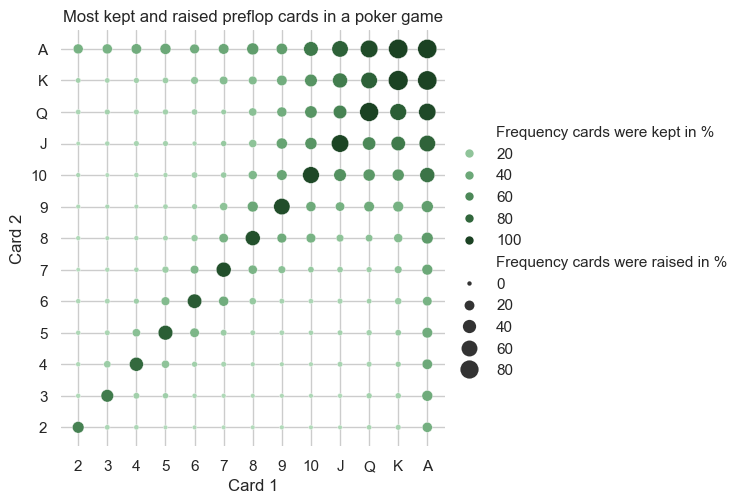

In [16]:
df_preflop = df[(df['stage'] == 'preflop')]
df_preflop = enrichDataframeForPlot(df_preflop)
df_preflop_f = df_preflop[(df_preflop['action'] == 'F')]
df_preflop_r = df_preflop[(df_preflop['action'] == 'R')]

df_plot = df_preflop_f.groupby(["card1", "card2"])['index'].count() / df_preflop.groupby(["card1", "card2"])['index'].count()
df_plot = df_plot.reset_index().rename(columns = {'index':'fold_pct'})
df_plot['fold_pct'] = df_plot['fold_pct'].fillna(0)
df_plot['keep_pct'] = 100 * (1 - df_plot['fold_pct'])

df_plot_r = df_preflop_r.groupby(["card1", "card2"])['index'].count() / df_preflop.groupby(["card1", "card2"])['index'].count()
df_plot_r = df_plot_r.reset_index().rename(columns = {'index':'raise_pct'})
df_plot['raise_pct'] = df_plot_r['raise_pct']
df_plot['raise_pct'] = 100 * df_plot['raise_pct'].fillna(0)

df_plot = df_plot.rename(columns={"keep_pct": "Frequency cards were kept in %"})
df_plot = df_plot.rename(columns={"raise_pct": "Frequency cards were raised in %"})

# create plot
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=0.8, as_cmap=True)
g = sns.relplot(
    data=df_plot,
    x="card1", y="card2",
    hue="Frequency cards were kept in %", size="Frequency cards were raised in %",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Customize ticks
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], labels=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.yticks(ticks=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], labels=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.title("Most kept and raised preflop cards in a poker game")
plt.xlabel("Card 1")
plt.ylabel("Card 2")

# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Most kept and raised preflop cards in a poker game.png', bbox_inches='tight')
plt.show()

We can see that the cards which are the most kept and raised in the preflop phase of a poker game are pairs and when players have 2 cards which are both higher than Jack

### Let's plot to show which preflop cards have the best average return

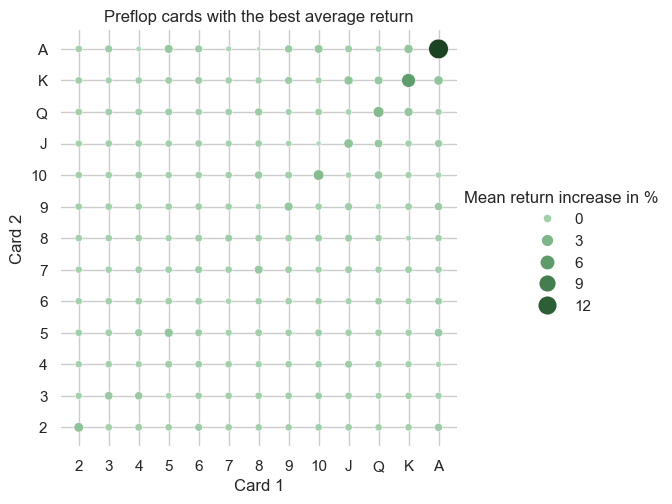

In [17]:
df_plot = enrichDataframeForPlot(df)
df_plot = df.groupby(["game_id", "player_id", "card1", "card2"])['pct_score'].max()
df_plot = df_plot.reset_index()

df_plot = df_plot.groupby(["card1", "card2"])['pct_score'].mean()
df_plot = df_plot.reset_index().rename(columns = {'pct_score':'pct_score_mean'})
df_plot = df_plot.sort_values(by='pct_score_mean', ascending=False)

df_plot['pct_score_mean'] = 100 * df_plot['pct_score_mean']
df_plot = df_plot.rename(columns={"pct_score_mean": "Mean return increase in %"})

# create plot
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.2, light=0.8, as_cmap=True)
g = sns.relplot(
    data=df_plot,
    x="card1", y="card2",
    hue="Mean return increase in %", size="Mean return increase in %",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# Customize ticks
plt.xticks(ticks=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], labels=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.yticks(ticks=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], labels=['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A'])
plt.title("Preflop cards with the best average return")
plt.xlabel("Card 1")
plt.ylabel("Card 2")

# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Preflop cards with the best average return.png', bbox_inches='tight')
plt.show()

We can see that the preflop cards which have the best average return are the pair of Aces and the pair of Kings

### Let's plot to show which hands are the most often kept in the preflop

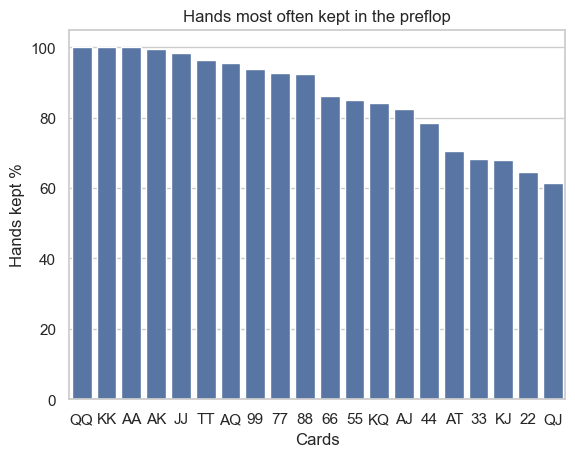

In [18]:
# Hands most often kept in the preflop
import matplotlib.pyplot as plt
df_plot = df_preflop_f.groupby(["cards_simplified"])['index'].count() / df_preflop.groupby(["cards_simplified"])['index'].count()
df_plot = df_plot.reset_index().rename(columns = {'index':'fold_pct', 'cards_simplified':'cards'})
df_plot['fold_pct'] = 100 * df_plot['fold_pct'].fillna(0)
df_plot['keep_pct'] = 100 - df_plot['fold_pct']
df_plot = df_plot.sort_values(by='keep_pct', ascending=False)
df_plot_limit = df_plot.head(20)

my_plot = sns.barplot(x='cards', y='keep_pct', data=df_plot_limit).tick_params(axis='x')
# Customize ticks
plt.title('Hands most often kept in the preflop')
plt.xlabel("Cards")
plt.ylabel("Hands kept %")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Hands most often kept in the preflop.png', bbox_inches='tight')
plt.show()

We can see that players usually keep pairs such as Pairs of Aces, Kings, Queens, Jacks...

### Let's plot to show which hands are the most often folded in the preflop

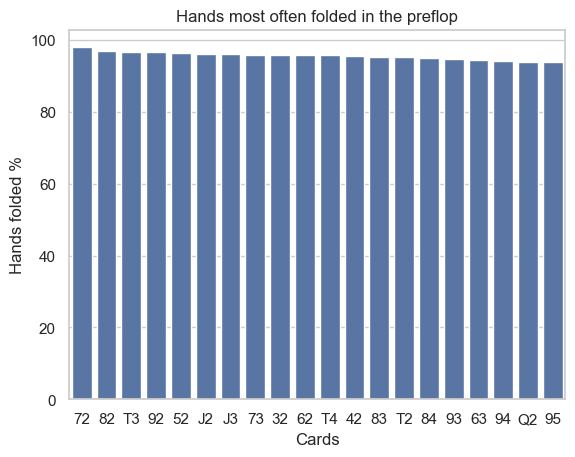

In [19]:
import matplotlib.pyplot as plt
df_plot = df_plot.sort_values(by='fold_pct', ascending=False)
df_plot_limit = df_plot.head(20)

my_plot = sns.barplot(x='cards', y='fold_pct', data=df_plot_limit).tick_params(axis='x')
# Customize ticks
plt.title('Hands most often folded in the preflop')
plt.xlabel("Cards")
plt.ylabel("Hands folded %")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Hands most often folded in the preflop.png', bbox_inches='tight')
plt.show()

We can see that the hand the most often folded is 72 which is one of the worst hand in Poker

### Let's plot to show which starting hands are the top 10 best in term of average profit made

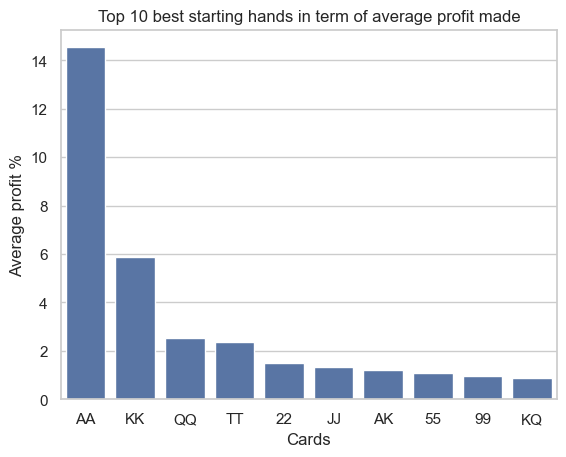

In [20]:
df_plot = enrichDataframeForPlot(df)
df_plot = df_plot.groupby(["game_id", "player_id", "cards_simplified"])['pct_score'].max()
df_plot = df_plot.reset_index()

df_plot = df_plot.groupby(["cards_simplified"])['pct_score'].mean()
df_plot = df_plot.reset_index().rename(columns = {'cards_simplified':'cards', 'pct_score':'pct_score_mean'})
df_plot = df_plot.sort_values(by='pct_score_mean', ascending=False)
df_plot['pct_score_mean'] = 100 * df_plot['pct_score_mean']
df_plot_limit = df_plot.head(10)

my_plot = sns.barplot(x='cards', y='pct_score_mean', data=df_plot_limit).tick_params(axis='x')
# Customize ticks
plt.title('Top 10 best starting hands in term of average profit made')
plt.xlabel("Cards")
plt.ylabel("Average profit %")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Top 10 best starting hands in term of average profit made.png', bbox_inches='tight')
plt.show()

We can see that the preflop cards which have the best average return are the pair of Aces and the pair of Kings

### Let's plot to show which starting hands are the top 10 worst in term of average profit made

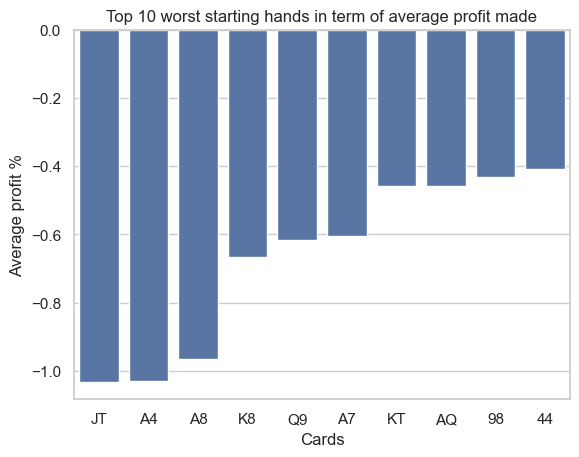

In [21]:
df_plot = df_plot.sort_values(by='pct_score_mean', ascending=True)
df_plot_limit = df_plot.head(10)

my_plot = sns.barplot(x='cards', y='pct_score_mean', data=df_plot_limit).tick_params(axis='x')
# Customize ticks
plt.title('Top 10 worst starting hands in term of average profit made')
plt.xlabel("Cards")
plt.ylabel("Average profit %")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Top 10 worst starting hands in term of average profit made.png', bbox_inches='tight')
plt.show()

The worst starting hand are JT and hands with an Ace with a low card

### Let's plot to show the top 10 most raised flops

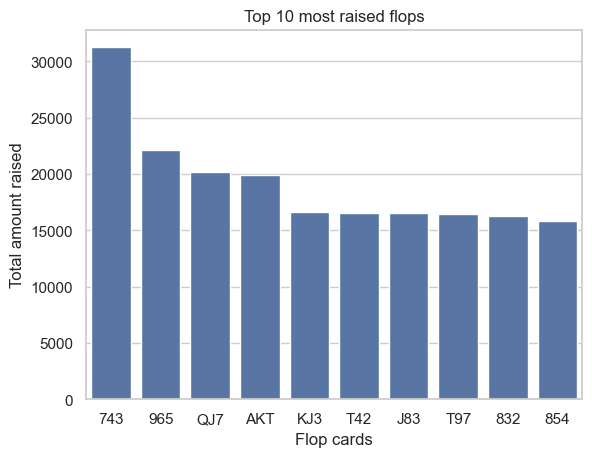

In [22]:
# top 10 most raised flop
df_plot = df[(df['stage'] == 'flop')]
df_plot = enrichDataframeForPlot(df_plot)
df_plot = df_plot.groupby(["flop_simplified"])['amount_raised'].sum()
df_plot = df_plot.reset_index().rename(columns = {'flop_simplified':'flop'})
df_plot = df_plot.sort_values(by='amount_raised', ascending=False)

my_plot = sns.barplot(x='flop', y='amount_raised', data=df_plot.head(10)).tick_params(axis='x')
# Customize ticks
plt.title('Top 10 most raised flops')
plt.xlabel("Flop cards")
plt.ylabel("Total amount raised")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Top 10 most raised flops.png', bbox_inches='tight')
plt.show()

The flop the most raised are the ones which have potential to make a straight with connected cards like 743 or 965

### Let's show the top 10 least raised flops

In [23]:
# top 10 least raised flop
df_plot = df_plot.sort_values(by='amount_raised', ascending=True)
df_plot.head(10)

,flop,amount_raised
439,T99,0
120,A44,0
315,KKJ,0
60,855,0
266,K44,0
106,988,0
22,644,0
29,664,0
241,J99,0
424,T77,0


The flop the least raised are the ones which have already a pair in it, like T99 or A44 for example

## Feature importances
We want to try to find which features of the dataset are the most relevant to predit the action that the player will play (Fold, check/call or raise).

### Feature importances using Random Forest
Random Forest models offer feature importance, which helps in understanding which features are more influential in predictions.

In [24]:
X = df[['stage_int', 'position_int', 'amount_required', 'amount_committed', 'nb_players_left', 'nb_previous_raise', 'nb_straight_player_cards',
       'nb_straight_community_cards', 'nb_flush_player_cards', 'nb_flush_community_cards', 'chen_score', 'cards_score']]
y = df['action_int']

# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

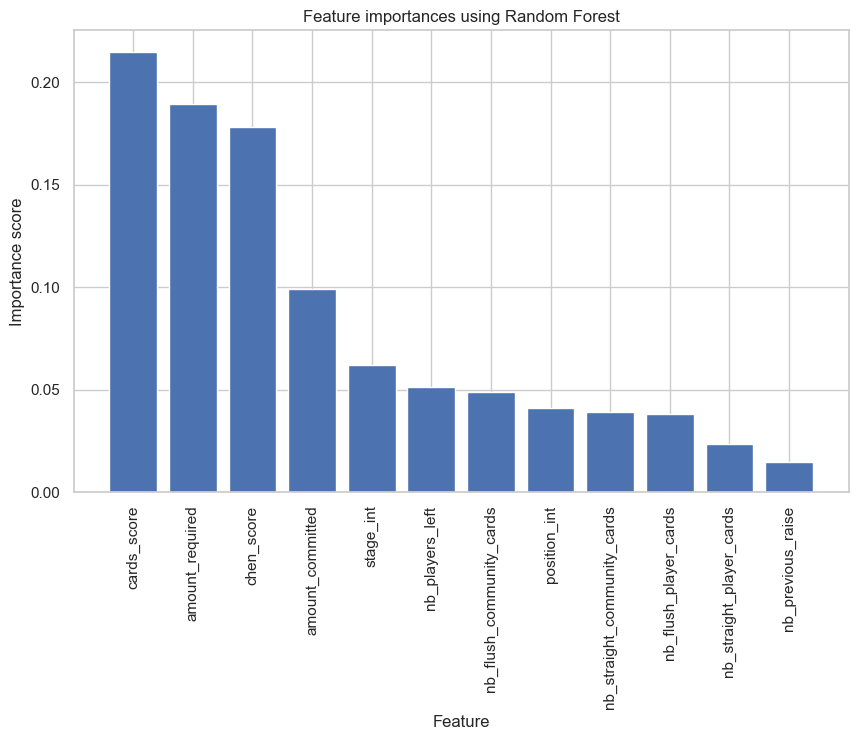

In [26]:
import matplotlib.pyplot as plt
# Feature Importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances using Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(['stage_int', 'position_int', 'amount_required', 'amount_committed', 'nb_players_left', 'nb_previous_raise', 'nb_straight_player_cards',
       'nb_straight_community_cards', 'nb_flush_player_cards', 'nb_flush_community_cards', 'chen_score', 'cards_score'])[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance score')
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Feature importances using Random Forest.png', bbox_inches='tight')
plt.show()

We can see that the top 3 features are cards_score, amount_required and chen_score which all have an importance score greater than 0.1

### Feature importances using Logistic_regression
With Logistic_regression

In [27]:
# Model: Linear Regression
pipelined_model = Pipeline([
    ('col_transformer', make_column_transformer((OneHotEncoder(drop = 'first'), make_column_selector(dtype_include=object)), remainder = StandardScaler())),
    ('lgr', LogisticRegression(multi_class='ovr', random_state=42, max_iter=1000))
])
pipelined_model.fit(X_train, y_train)
y_pred = pipelined_model.predict(X_test)
pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000176D44A8440>)])),
                ('lgr',
                 LogisticRegression(max_iter=1000, multi_class='ovr',
                                    random_state=42))])

In [28]:
# Important Features
# We explore the coefficients of the model. Because the data were scaled, we can think about the coefficients as speaking to a relative feature importance. 
# We extract the coefficients from the model and sort their absolute values from greatest to least. 
# We create a DataFrame called coef_df that contains the feature name and coefficient. The results begin as shown below:
feature_names = pipelined_model.named_steps['col_transformer'].get_feature_names_out() 
selected_features = pipelined_model.named_steps['col_transformer'].get_feature_names_out()
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': pipelined_model.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

coef_df.head(15)

,feature,coefs
2,amount_required,1.891997
10,chen_score,1.852684
11,cards_score,1.643490
0,stage_int,1.410054
4,nb_players_left,1.177973
3,amount_committed,1.170348
8,nb_flush_player_cards,1.116396
9,nb_flush_community_cards,0.501819
6,nb_straight_player_cards,0.434173
5,nb_previous_raise,0.242963


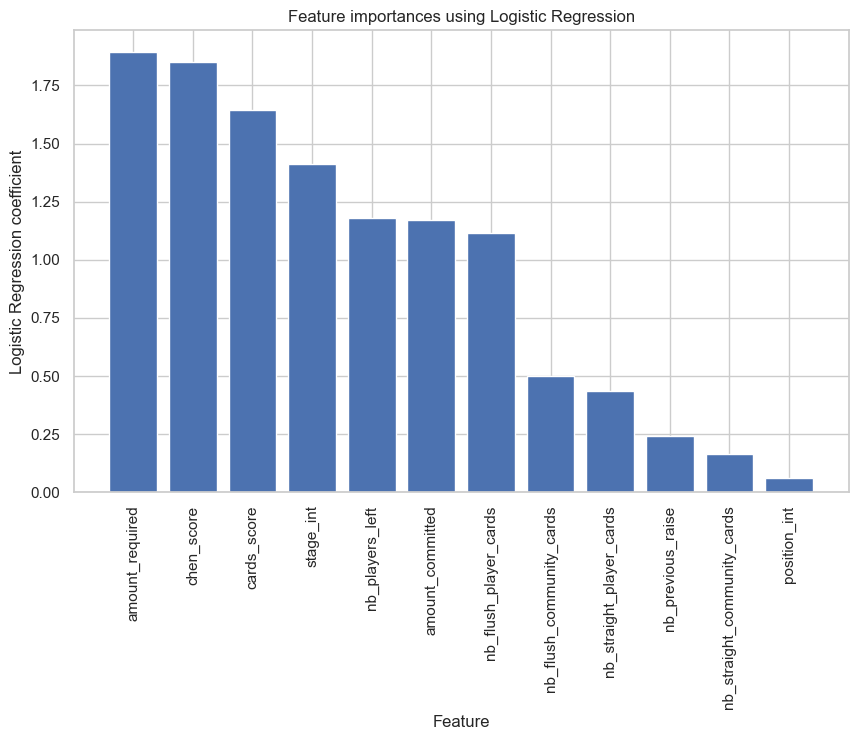

In [29]:
plt.figure(figsize=(10, 6))
plt.title("Feature importances using Logistic Regression")
plt.bar(coef_df['feature'], coef_df['coefs'], align="center")
plt.xticks(rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Logistic Regression coefficient')
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Feature importances using Logistic Regression.png', bbox_inches='tight')
plt.show()

We can see that the top 3 features are cards_score, amount_required and chen_score which all have the absolute value of the logistic regression coefficient greater than 1.5

### Plot Total cards score vs Amount raised by previous player (Amount required)

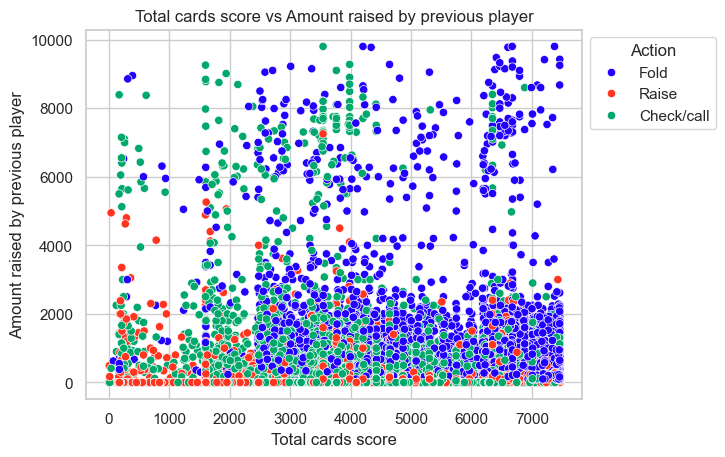

In [30]:
df_plot = df[['stage_int', 'position_int', 'amount_required', 'amount_committed', 'nb_players_left', 'nb_previous_raise', 'nb_straight_player_cards',
       'nb_straight_community_cards', 'nb_flush_player_cards', 'nb_flush_community_cards', 'chen_score', 'cards_score', 'action_int', 'action', 'amount_raised']]

# Create plot
plot = sns.scatterplot(data=df_plot, x='cards_score', y='amount_required', hue='action', palette=["#2100ff", "#ff3520", "#00a86b"])
# Customize ticks
plt.title("Total cards score vs Amount raised by previous player")
plt.xlabel("Total cards score")
plt.ylabel("Amount raised by previous player")
sns.move_legend(plot, "upper left", labels=["Fold", "Raise", "Check/call"], bbox_to_anchor=(1, 1), title="Action")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Total cards score vs Amount raised by previous player.png', bbox_inches='tight')
plt.show()

The plot shows the card score of all the cards from the player including the community cards and the 2 preflop player card in the X-axis
In the Y-axis, it shows the amount that another previous player raised before the current player's turn. The legend in Action shows the decision of the action of the current player. It could be to fold, check/call or raise. 
Note that the greater the cards score is, the worst the strength of the player's hand is.
From the plot, we can see that players fold more often when the cards score is greater than 2500 which means that the player has less than a Three of a kind.
When the score is better than 2500, which means they have at least a Three of a kind, we see that players tend to raise more frequently.
And in that case, when the previous player has raised a great amount of money, the current player tends to check/call more unless the cards score is very low, which means the player has a great hand

### Plot Chen score of the 2 initial cards vs Amount raised by previous player (Amount required)

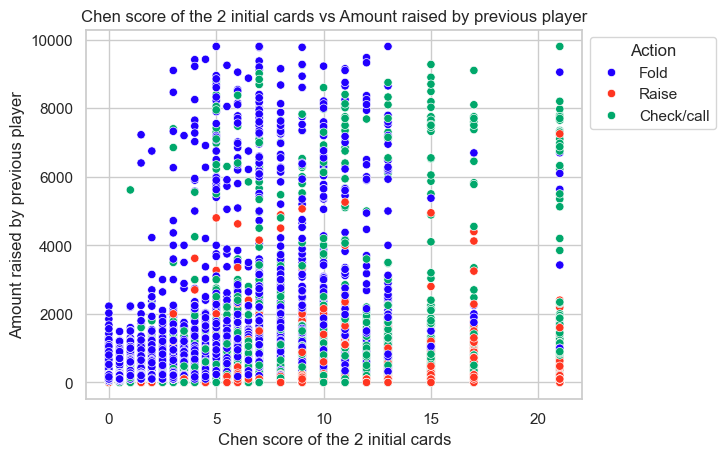

In [31]:
# Create plot
plot = sns.scatterplot(data=df_plot, x='chen_score', y='amount_required', hue='action', palette=["#2100ff", "#ff3520", "#00a86b"])
# Customize ticks
plt.title("Chen score of the 2 initial cards vs Amount raised by previous player")
plt.xlabel("Chen score of the 2 initial cards")
plt.ylabel("Amount raised by previous player")
sns.move_legend(plot, "upper left", labels=["Fold", "Raise", "Check/call"], bbox_to_anchor=(1, 1), title="Action")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Chen score of the 2 initial cards vs Amount raised by previous player.png', bbox_inches='tight')
plt.show()

The plot shows the chen score of the player's 2 preflop cards in the X-axis.
In the Y-axis, it shows the amount that another previous player raised before the current player's turn. The legend in Action shows the decision of the action of the current player. It could be to fold, check/call or raise. 
Note that the greater the chen score is, the better the strength of the player's initial 2 cards is.
From the plot, we can see that players raise when they have at least a chen score of 5 which means they have at least a pair or some suited connected cards. Player fold more often when the previous player has raised a great amount of money and the strength of their 2 preflop cards has a score less than 14 which means they have less than a pair of queens

## In case the player has decided to raise, by which amount did he raise ?
We need to answer a second question. In the case that the player has decided to raise, we need to figure out by which amount did he raise

### Plot Chen score of the 2 initial cards vs Amount raised by current player (Amount raised)

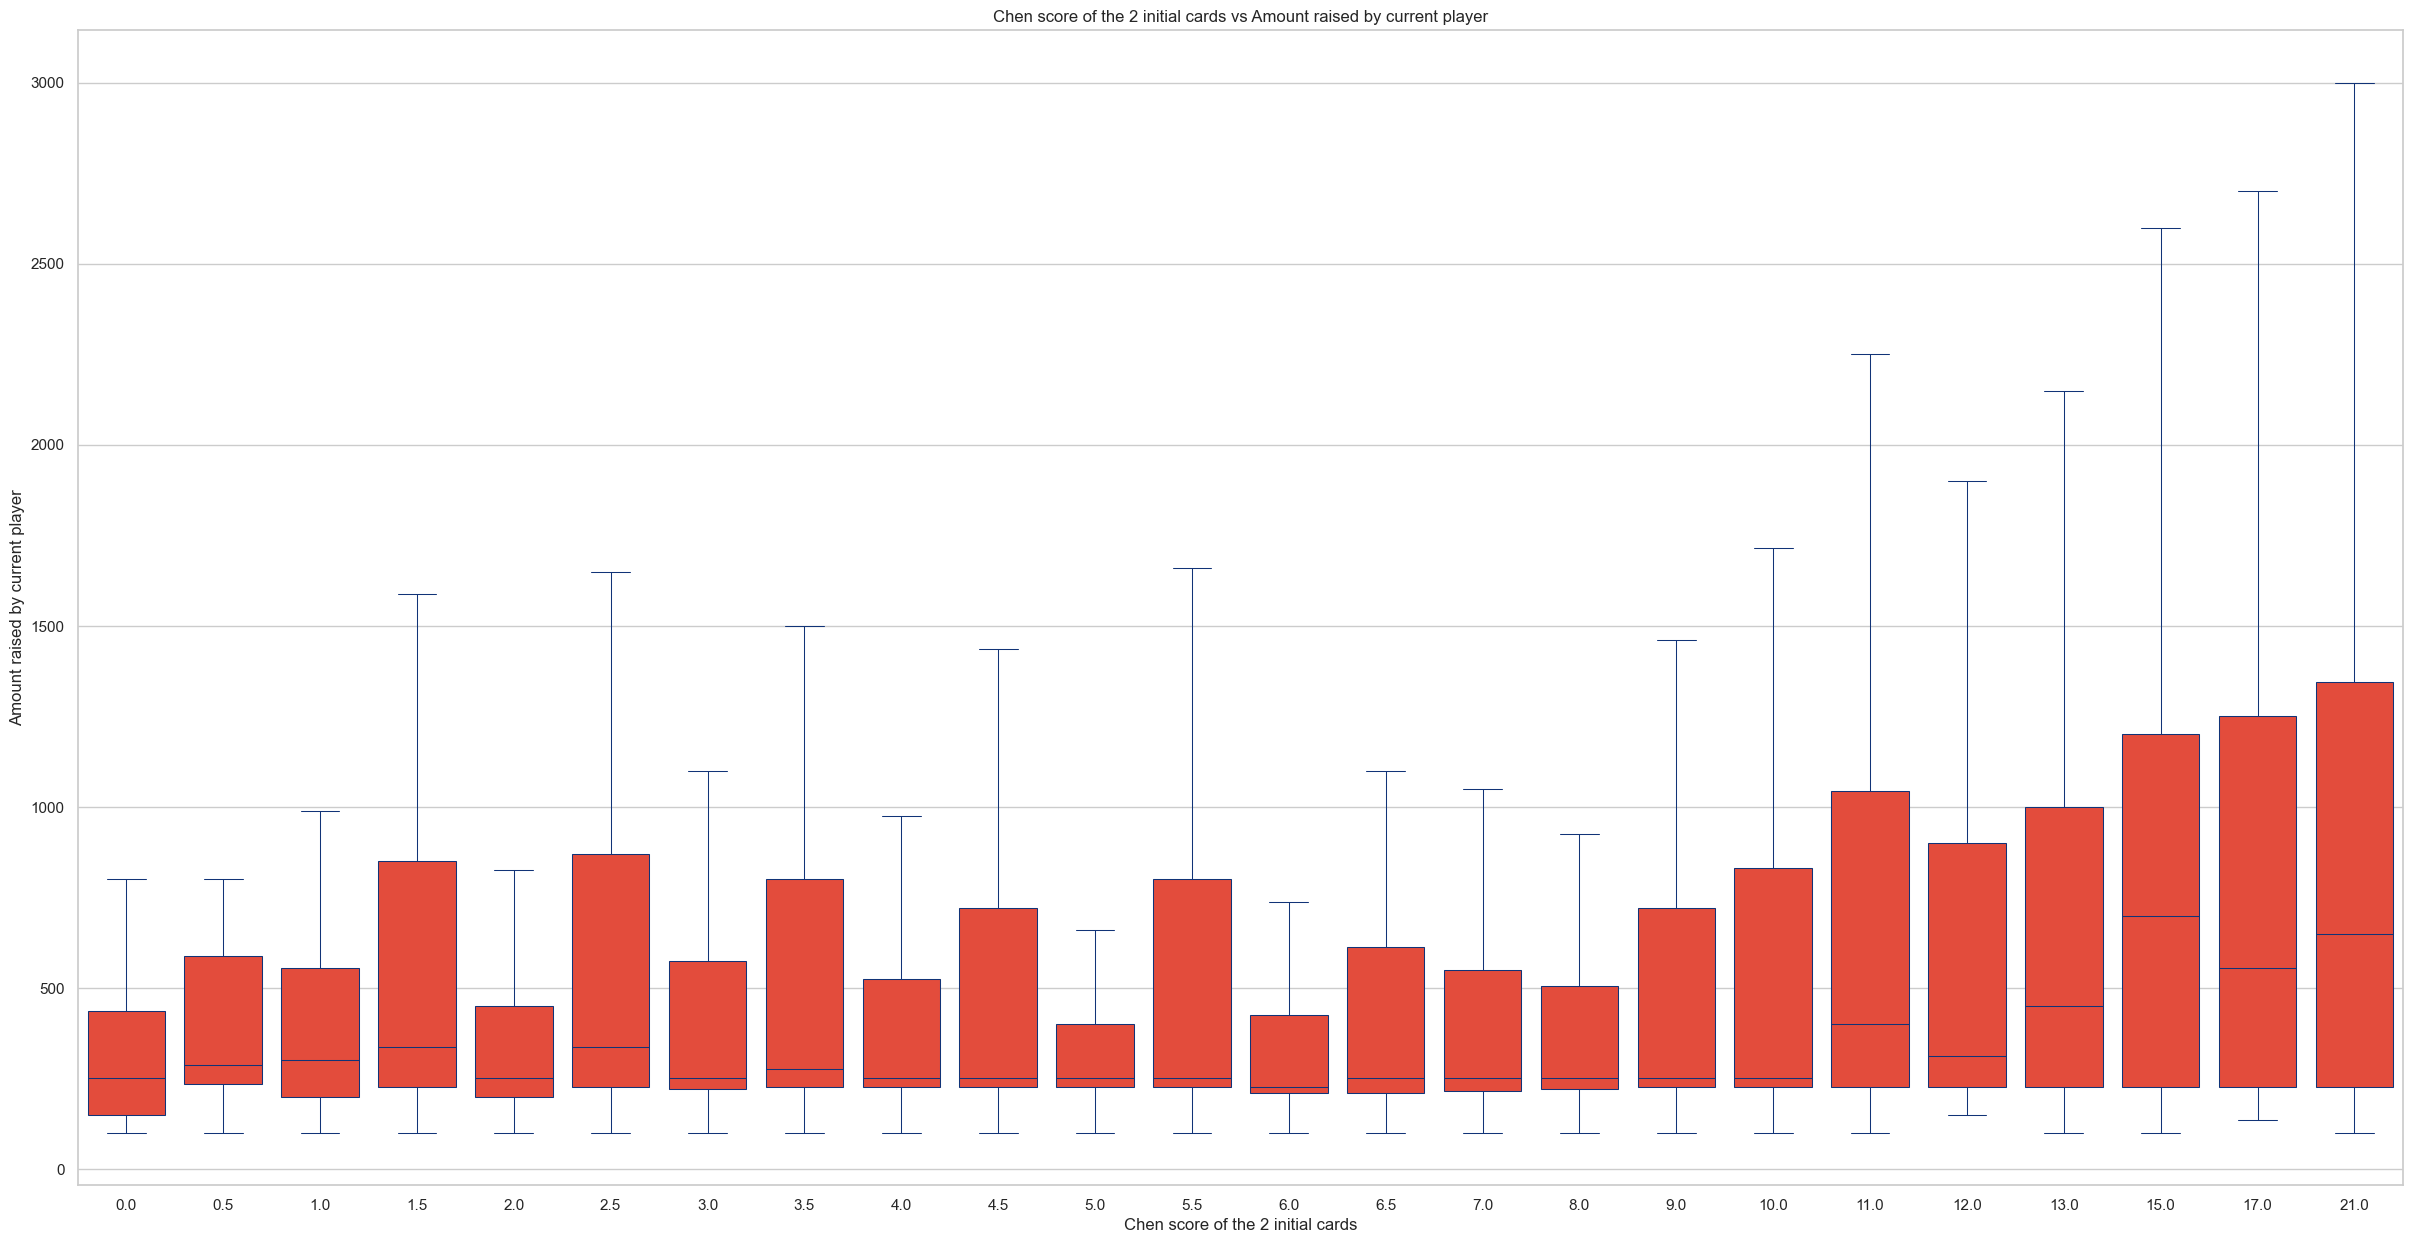

In [32]:
df_r = df[(df['action'] == 'R')]
df_plot = df_r[['stage_int', 'position_int', 'amount_required', 'amount_committed', 'nb_players_left', 'nb_previous_raise', 'nb_straight_player_cards',
       'nb_straight_community_cards', 'nb_flush_player_cards', 'nb_flush_community_cards', 'chen_score', 'cards_score', 'action_int', 'action', 'amount_raised']]

# Create plot
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(data=df_plot, x="chen_score", y="amount_raised", color="#ff3520", linecolor="#137", linewidth=.75, showfliers=False)
# Customize ticks
plt.title("Chen score of the 2 initial cards vs Amount raised by current player")
plt.xlabel("Chen score of the 2 initial cards")
plt.ylabel("Amount raised by current player")
# Save figure to PNG file
plt.savefig('images/Exploratory_data_analysis/Chen score of the 2 initial cards vs Amount raised by current player', bbox_inches='tight')
plt.show()

The plot shows the chen score of the player's 2 preflop cards in the X-axis. In the Y-axis, it shows the amount that the current player has decided to raise. Note that the greater the chen score is, the better the strength of the player's initial 2 cards is. From the plot, we can see that once players decided to raise, they tend to raise a greater amount when the chen score is higher

### What is the mean of the raised amount ?

In [33]:
df_r[['amount_raised']].describe()

,amount_raised
count,18472.000000
mean,669.302999
std,1171.050702
min,100.000000
25%,225.000000
50%,250.000000
75%,700.000000
max,9900.000000


The mean of the raised amount is about 669, which is a bit more than 6 times the minimum bet of 100.
However, the 50th percentile is 250, which is 2.5 times the minimum bet of 100.

# Observations about Poker Data
- The data has 91356 rows and 31 columns
- Each row represents a turn during a poker game where a player had to decide about an action : fold, check/call, or raise his hand. It could be during the preflop, flop, turn or river stage of the game
- There are 10000 unique games played between 6 players.
- There are no duplicates in the dataset. There could be some missing values for the columns flop, turn, and river but it means the phase of the game at the moment the player had to make an action was not yet at the flop, turn or river
- The cards which are the most kept and raised in the preflop phase of a poker game are pairs and when players have 2 cards which are both higher than Jack. The 72 is the hand that players fold the most
- The preflop cards which have the best average return are the pair of Aces and the pair of Kings. JT and hands with an Ace and a low card have the worst return
- Players tend to raise when the flop cards have a potential to make a straight with connected cards like 743 or 965. They tend to avoid raising when there is already a pair in the flop cards
- The top 3 most important features to predict the action that the player will play (Fold, check/call or raise) seem to be the cards_score, amount_required and chen_score. The next 3 are the stage_int, nb_players_left and amount_committed
- Players fold more often when they have less than a Three of a kind.
When they have better than that, players tend to raise more frequently. And when the previous player has raised a great amount of money, the current player tends to check/call more unless the player has a great hand
- Considering only the 2 preflop cards, players raise when they have at least a pair or some suited connected cards. Players fold more often when they have less than a pair of queens and when the previous player has raised a great amount of money
- Once players decided to raise, they tend to raise a greater amount when the chen score of their 2 initial cards is higher. The mean of the raised amount is a bit more than 6 times the minimum bet of 100. However, the 50th percentile is 2.5 times the minimum bet.